In [1]:
!pip install shap
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.5 MB/s eta 0:00:00


In [3]:
import shap
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming your DataFrame is named 'df' and the target variable is 'DiagPeriodL90D'
df = pd.read_csv('train_final3_updatedBMI.csv')

# Split the data into features (X) and target variable (y)
X = df.drop(['DiagPeriodL90D'], axis=1)
y = df['DiagPeriodL90D']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Impute missing values with the mean (you can choose a different strategy)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialize Gradient Boosting classifier with specified parameters
gb_model = GradientBoostingClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_leaf=1
)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Generate predictions on the test set
gb_predictions = gb_model.predict(X_test)

# Evaluate accuracy
accuracy_gb = accuracy_score(y_test, gb_predictions)
print(f'Gradient Boosting Accuracy: {accuracy_gb}')

explainer = shap.Explainer(gb_model, X)
shap_values = explainer(X)

Gradient Boosting Accuracy: 0.8144848954298993


100%|===================| 12892/12906 [00:16<00:00]       

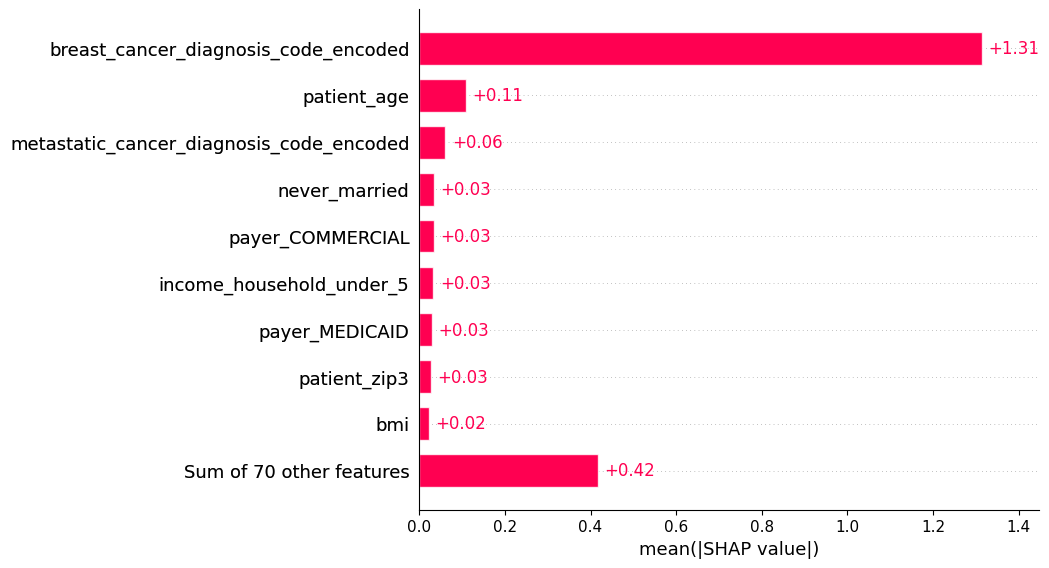

In [4]:
shap.plots.bar(shap_values)

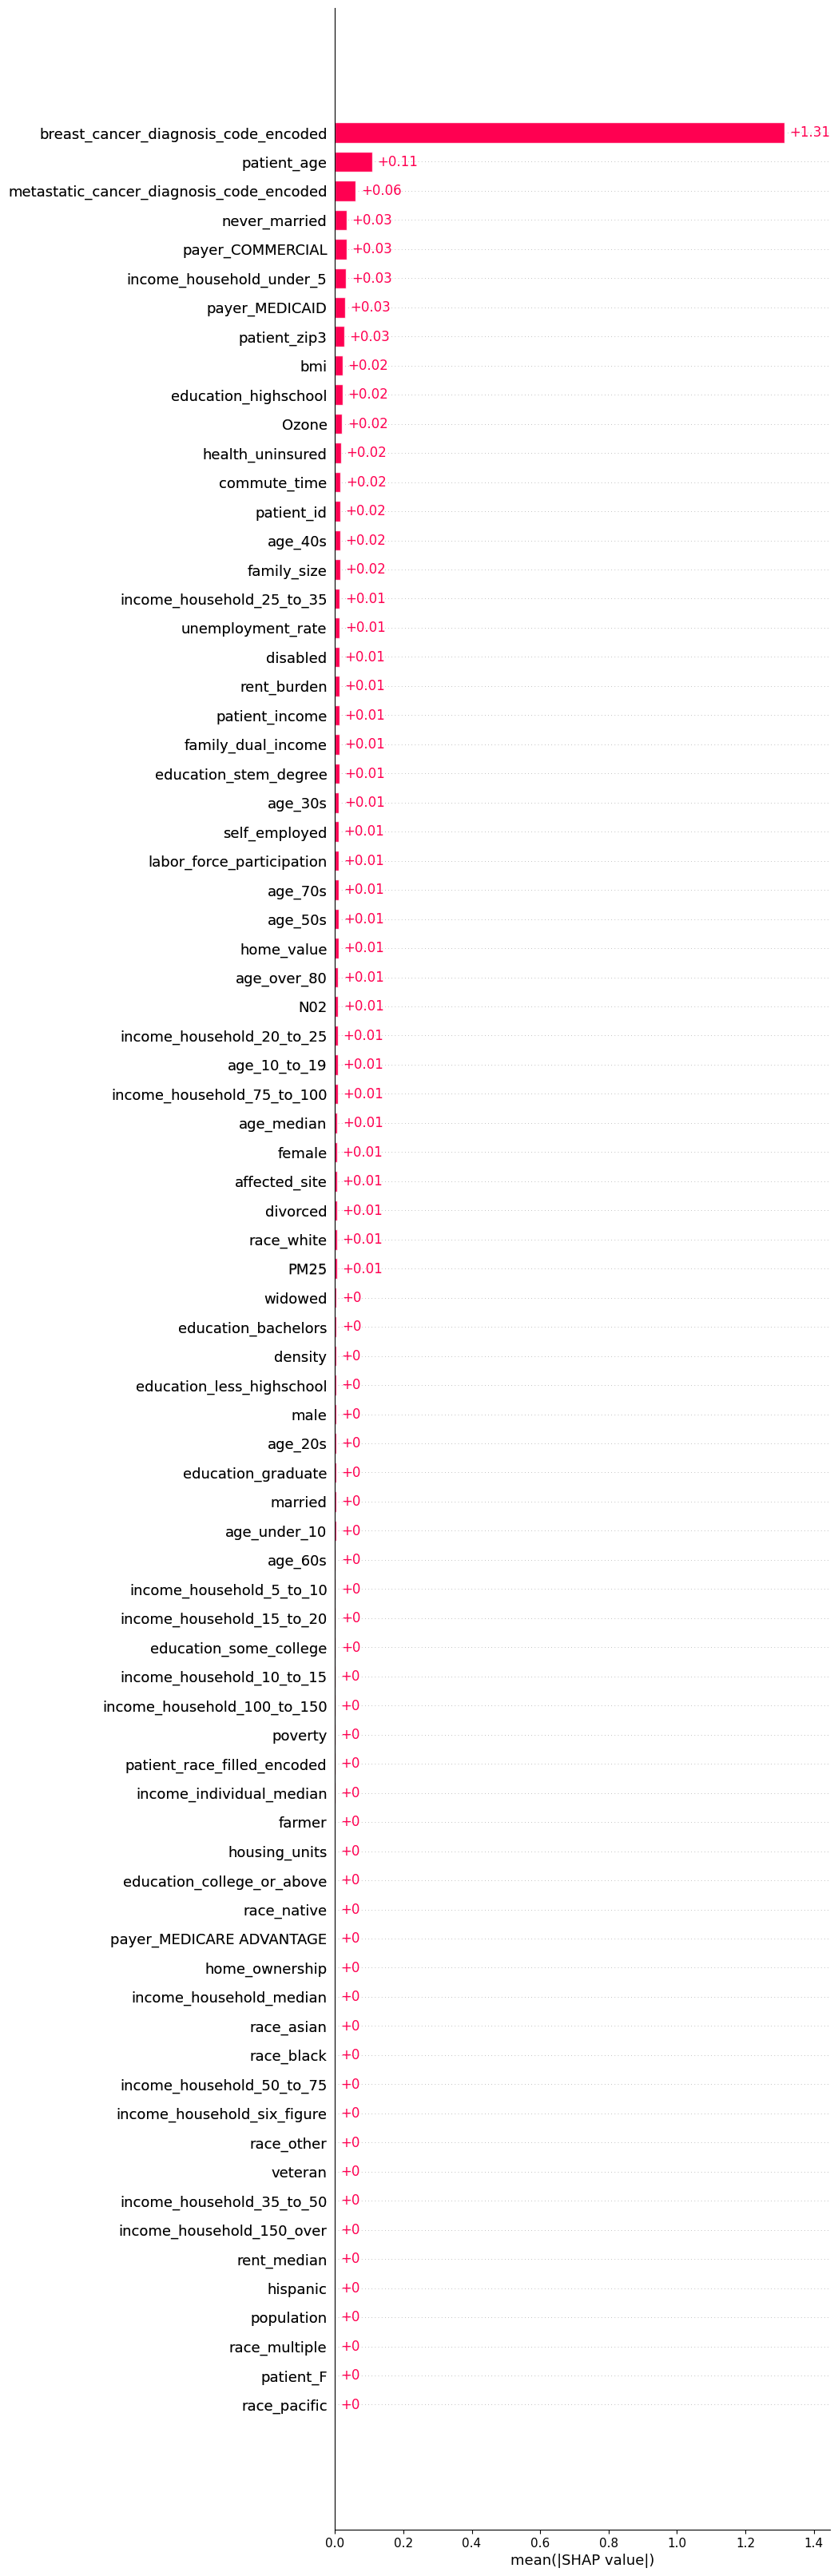

In [5]:
shap.plots.bar(shap_values, max_display=83)

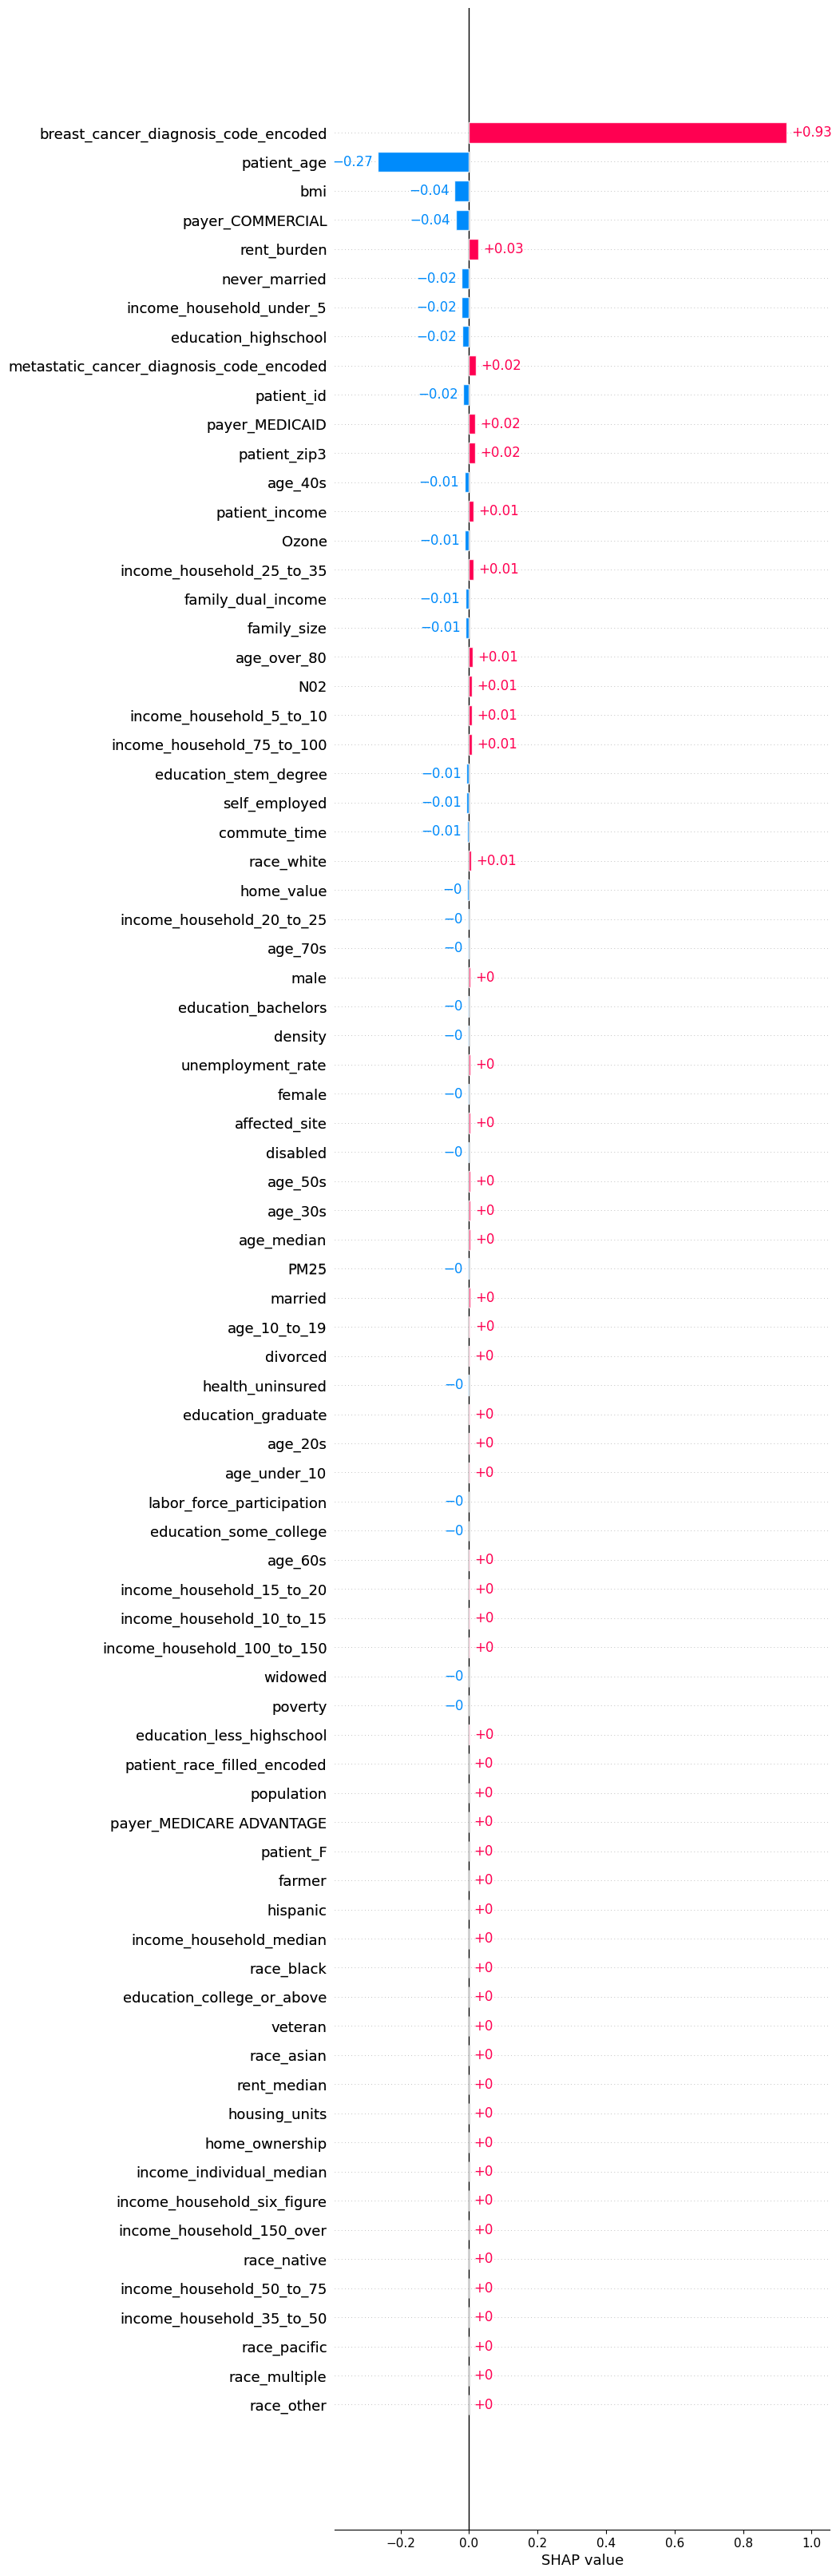

In [6]:
shap.plots.bar(shap_values[2], max_display=83)

In [7]:
import lightgbm as lgb

# Initialize LightGBM classifier with specified parameters
lgb_model = lgb.LGBMClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_child_samples=1
)

# Fit the model to the training data
lgb_model.fit(X_train, y_train)

# Generate predictions on the test set
lgb_predictions = lgb_model.predict(X_test)

# Evaluate accuracy
accuracy_lgb = accuracy_score(y_test, lgb_predictions)
print(f'LightGBM Accuracy: {accuracy_lgb}')

# Note: For SHAP values, you can use the same Explainer and SHAP values computation as in the Gradient Boosting example
explainer_lgb = shap.Explainer(lgb_model, X)
shap_values_lgb = explainer_lgb(X)


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17160
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

 98%|===================| 12685/12906 [00:23<00:00]       

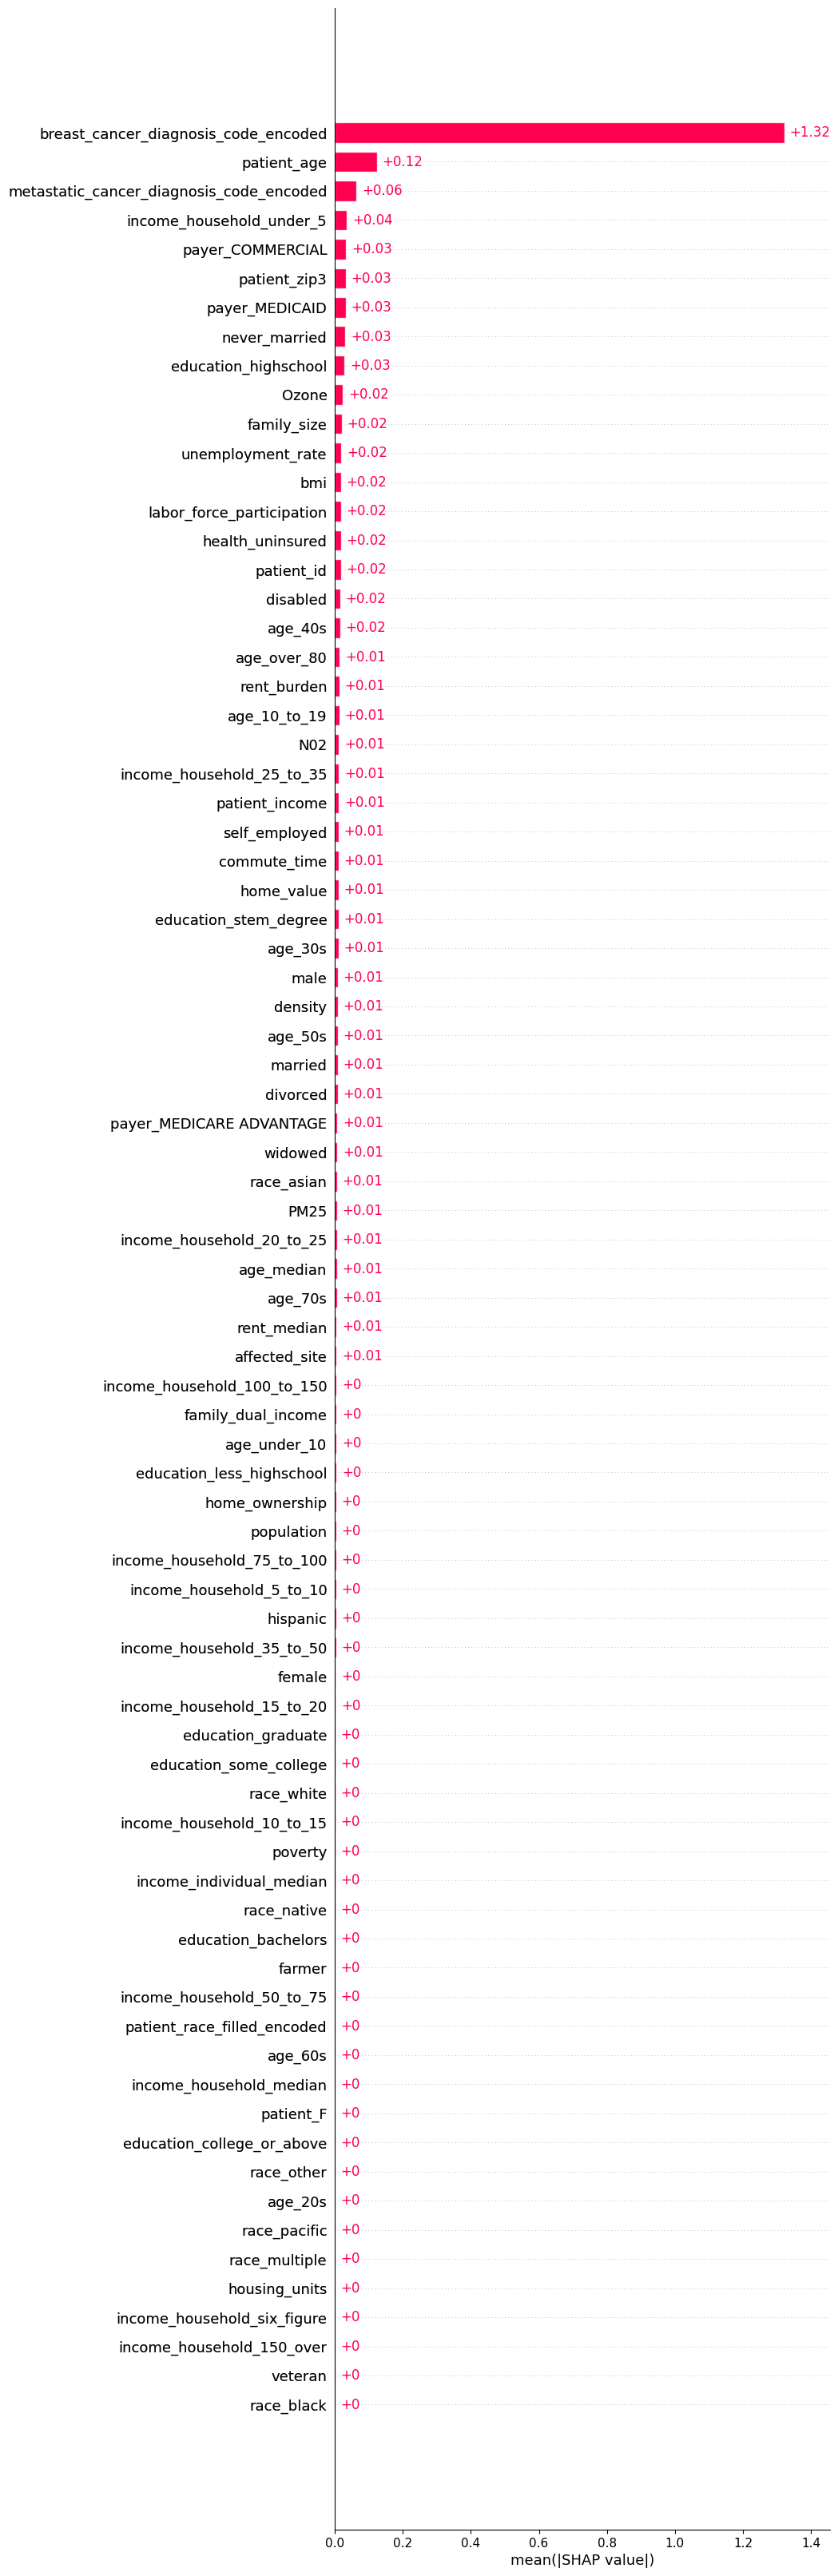

In [9]:
shap.plots.bar(shap_values_lgb, max_display=83)

0:	learn: 0.6474402	total: 28.4ms	remaining: 2.82s
1:	learn: 0.6115435	total: 46.8ms	remaining: 2.29s
2:	learn: 0.5831206	total: 78.3ms	remaining: 2.53s
3:	learn: 0.5609473	total: 99.6ms	remaining: 2.39s
4:	learn: 0.5432873	total: 122ms	remaining: 2.31s
5:	learn: 0.5295324	total: 141ms	remaining: 2.21s
6:	learn: 0.5184057	total: 158ms	remaining: 2.1s
7:	learn: 0.5096592	total: 177ms	remaining: 2.04s
8:	learn: 0.5027041	total: 199ms	remaining: 2.01s
9:	learn: 0.4971820	total: 217ms	remaining: 1.95s
10:	learn: 0.4930563	total: 252ms	remaining: 2.04s
11:	learn: 0.4894906	total: 283ms	remaining: 2.08s
12:	learn: 0.4859536	total: 310ms	remaining: 2.07s
13:	learn: 0.4834913	total: 342ms	remaining: 2.1s
14:	learn: 0.4818258	total: 371ms	remaining: 2.1s
15:	learn: 0.4802507	total: 396ms	remaining: 2.08s
16:	learn: 0.4789827	total: 422ms	remaining: 2.06s
17:	learn: 0.4779297	total: 447ms	remaining: 2.04s
18:	learn: 0.4767707	total: 476ms	remaining: 2.03s
19:	learn: 0.4760234	total: 494ms	remain

100%|===================| 12887/12906 [00:19<00:00]       

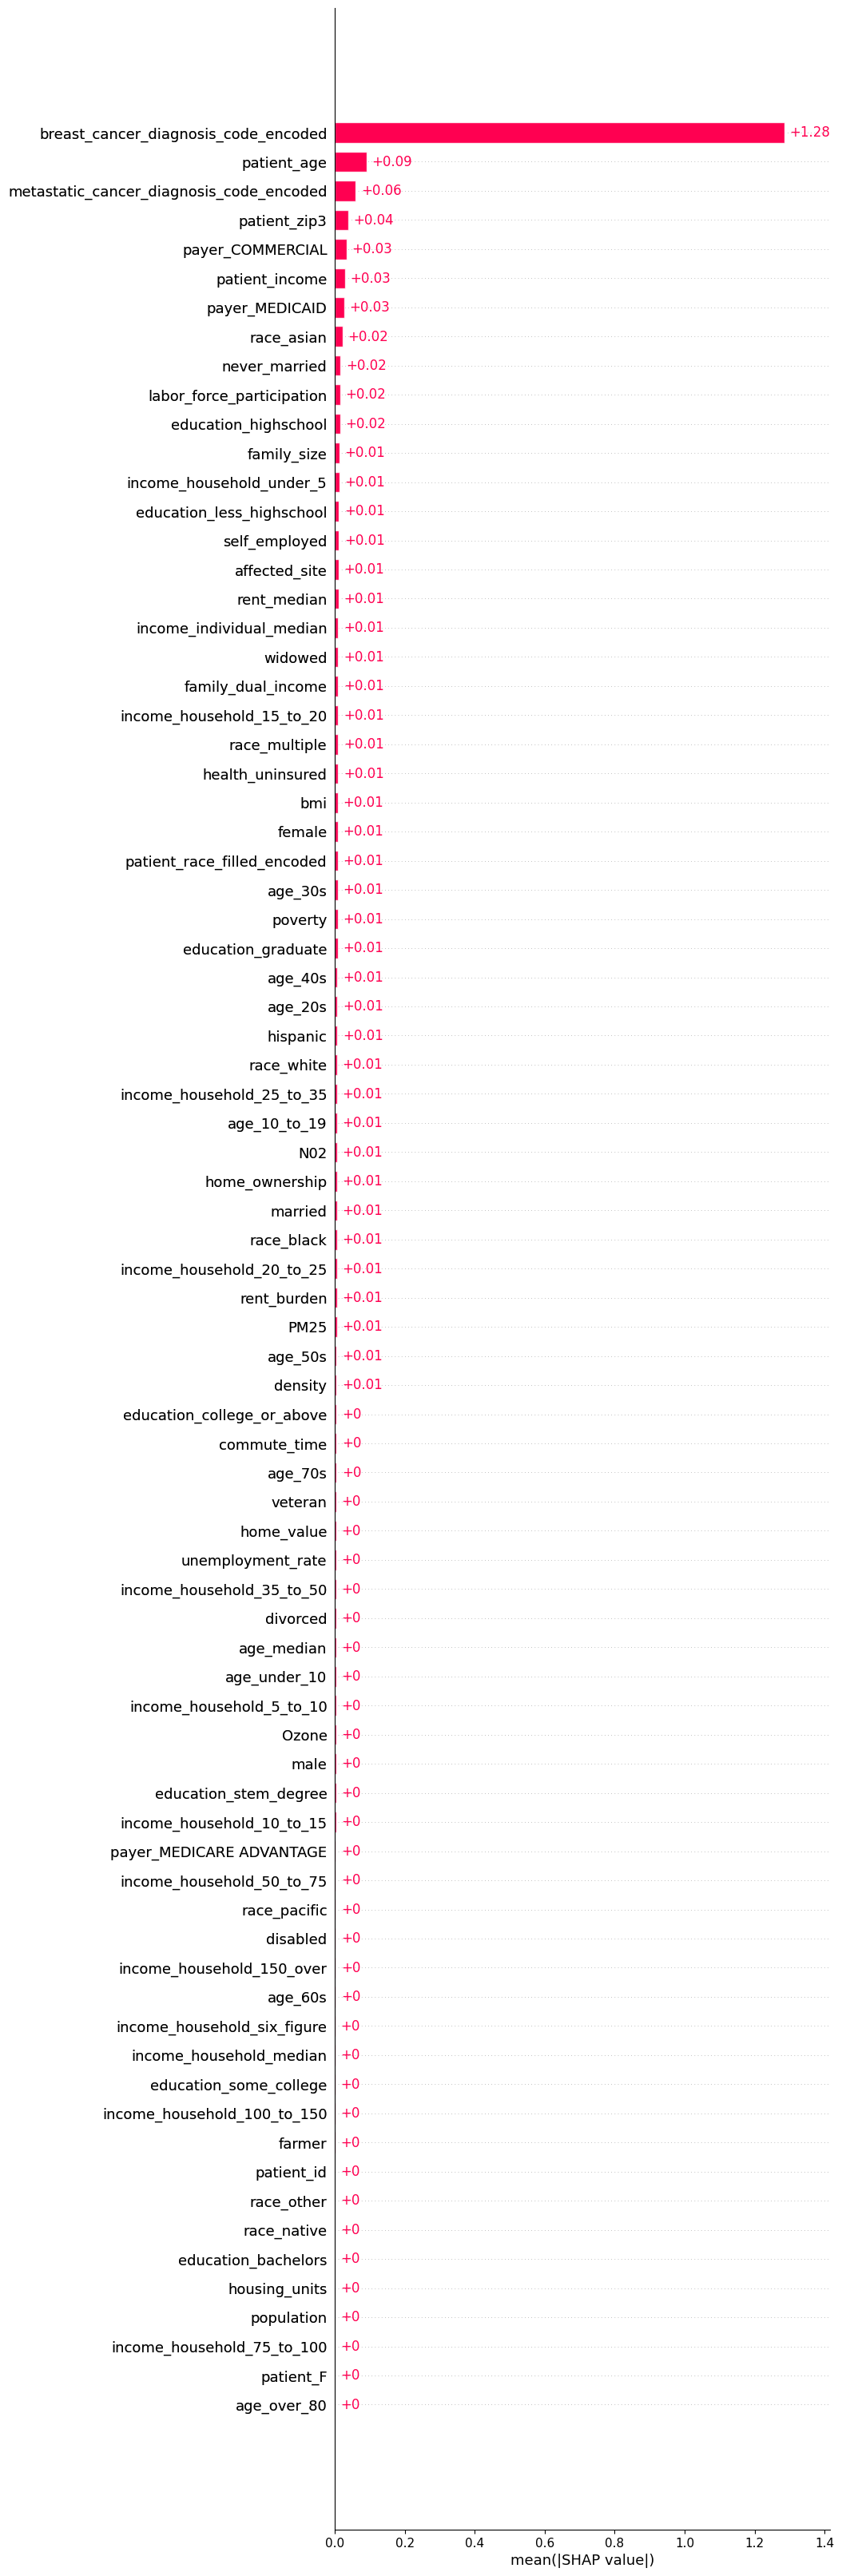

In [14]:
import catboost as cb

# Assuming your DataFrame is named 'df' and the target variable is 'DiagPeriodL90D'
df = pd.read_csv('train_final3_updatedBMI.csv')

# Split the data into features (X) and target variable (y)
X = df.drop(['DiagPeriodL90D'], axis=1)
y = df['DiagPeriodL90D']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Impute missing values with the mean (you can choose a different strategy)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
# Initialize CatBoost classifier with specified parameters
catboost_model = cb.CatBoostClassifier(
    random_seed=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)

# Fit the model to the training data
catboost_model.fit(X_train, y_train)

# Generate predictions on the test set
catboost_predictions = catboost_model.predict(X_test)

# Evaluate accuracy
accuracy_catboost = accuracy_score(y_test, catboost_predictions)
print(f'CatBoost Accuracy: {accuracy_catboost}')

# For SHAP values, you can use the same Explainer and SHAP values computation as in the previous examples
explainer_catboost = shap.Explainer(catboost_model, X)
shap_values_catboost = explainer_catboost(X)

shap.plots.bar(shap_values_catboost, max_display=83)

In [1]:
# import shap
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import train_test_split
# import pandas as pd

# # Load the data
# df = pd.read_csv('train_final3_updatedBMI.csv')

# # Split the data into features (X) and target variable (y)
# X = df.drop(['DiagPeriodL90D'], axis=1)
# y = df['DiagPeriodL90D']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Impute missing values with the mean (you can choose a different strategy)
# imputer = SimpleImputer(strategy='mean')
# X_train = imputer.fit_transform(X_train)
# X_test = imputer.transform(X_test)

# # Initialize AdaBoost classifier with specified parameters
# adaboost_model = AdaBoostClassifier(
#     n_estimators=100,
#     learning_rate=0.1,
#     random_state=42
# )

# # Fit the model to the training data
# adaboost_model.fit(X_train, y_train)

# # Generate predictions on the test set
# adaboost_predictions = adaboost_model.predict(X_test)

# # Evaluate accuracy
# accuracy_adaboost = accuracy_score(y_test, adaboost_predictions)
# print(f'AdaBoost Accuracy: {accuracy_adaboost}')

# # Create a KernelExplainer instance
# explainer = shap.KernelExplainer(adaboost_model.predict_proba, X_train)

# # Compute SHAP values
# shap_values = explainer.shap_values(X_test)

# # Plot the SHAP values
# shap.summary_plot(shap_values, X_test)


XGBoost Accuracy: 0.8140975987606507


 97%|=================== | 12518/12906 [00:16<00:00]       

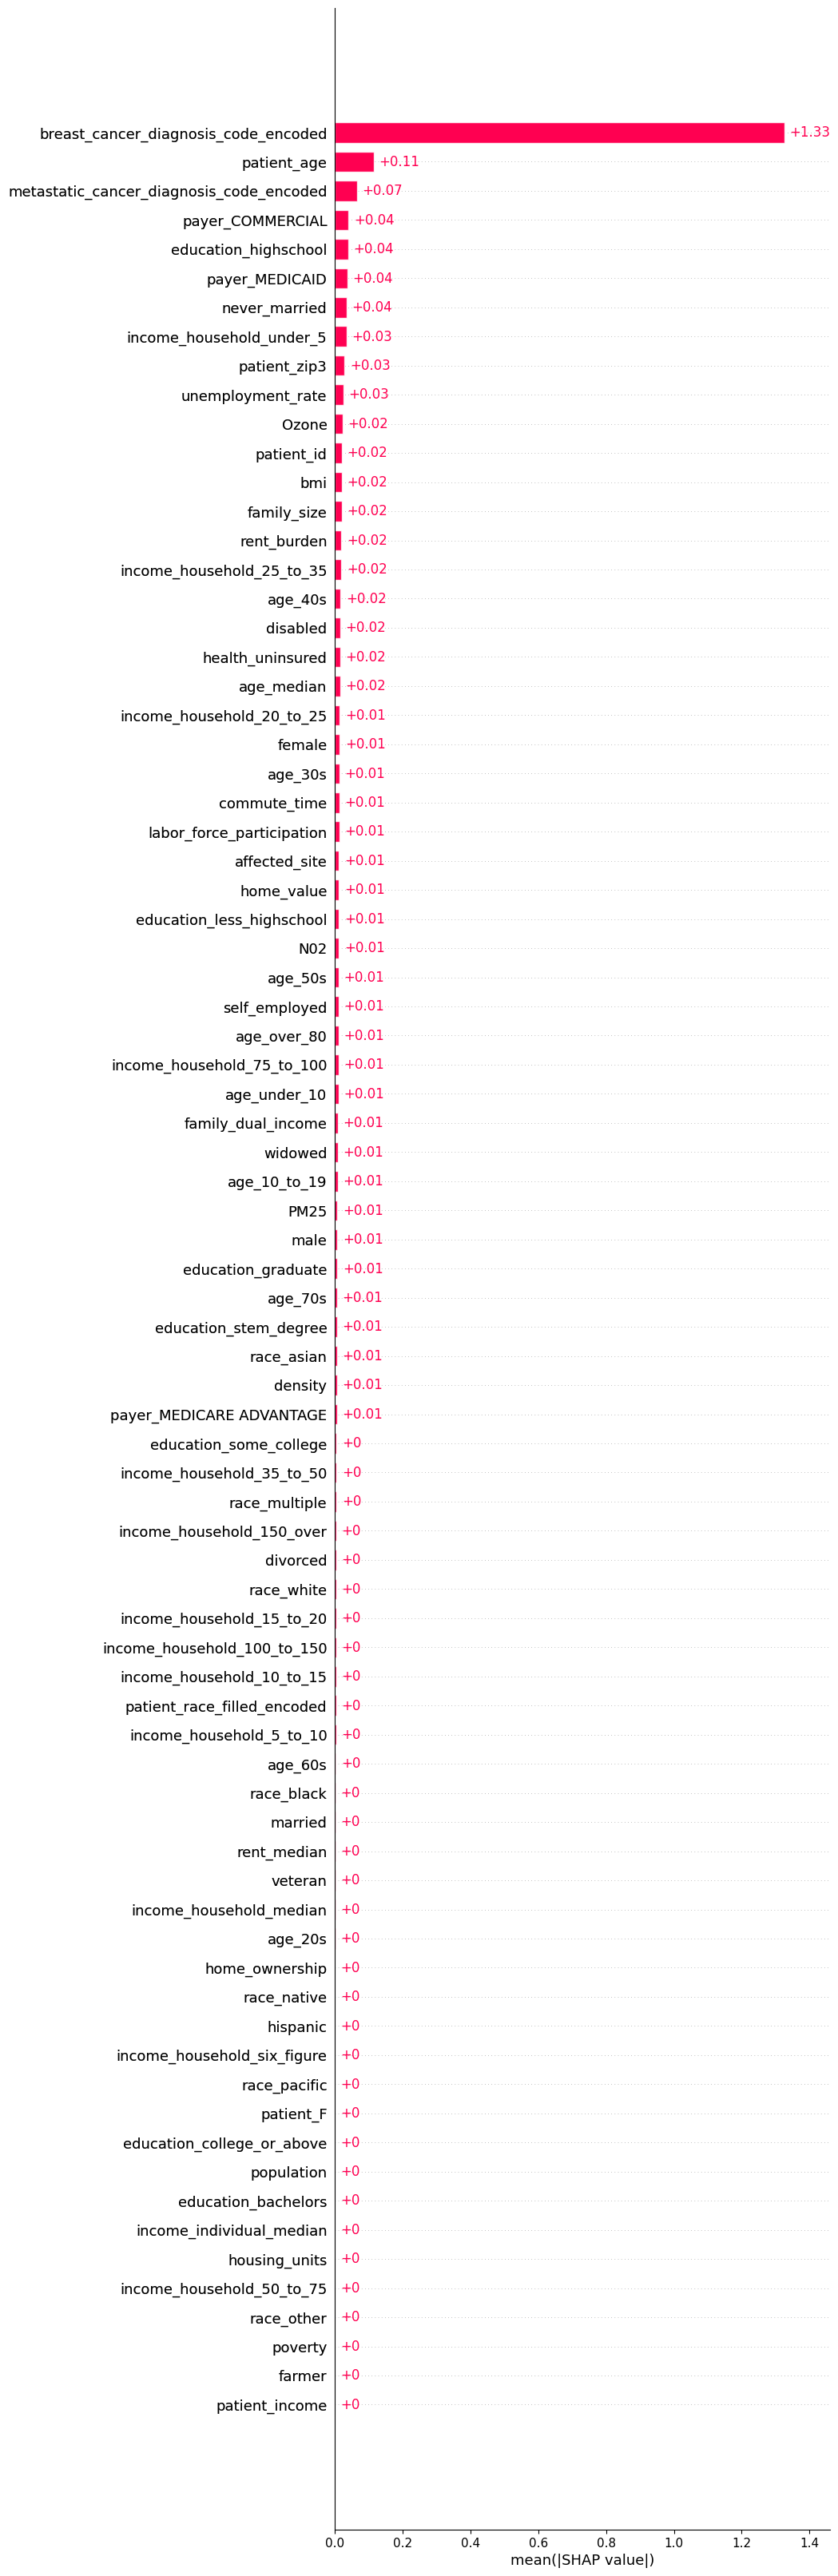

In [4]:
import xgboost as xgb
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Assuming your DataFrame is named 'df' and the target variable is 'DiagPeriodL90D'
df = pd.read_csv('train_final3_updatedBMI.csv')

# Split the data into features (X) and target variable (y)
X = df.drop(['DiagPeriodL90D'], axis=1)
y = df['DiagPeriodL90D']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Impute missing values with the mean (you can choose a different strategy)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialize XGBoost classifier with specified parameters
xgboost_model = xgb.XGBClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)

# Fit the model to the training data
xgboost_model.fit(X_train, y_train)

# Generate predictions on the test set
xgboost_predictions = xgboost_model.predict(X_test)

# Evaluate accuracy
accuracy_xgboost = accuracy_score(y_test, xgboost_predictions)
print(f'XGBoost Accuracy: {accuracy_xgboost}')

# For SHAP values, you can use the same Explainer and SHAP values computation as in the previous examples
explainer_xgboost = shap.Explainer(xgboost_model, X)
shap_values_xgboost = explainer_xgboost(X)

shap.plots.bar(shap_values_xgboost, max_display=83)


In [11]:
# ( Done ) top shap values trained on meta learner adaboost(score: top3=0.808, top4=0.807, top9=0.801, top2=0.778) : from GB
# top 3 + ozone + PM25 + N02 = 0.806
# top 3 + never_married = 0.812
# top 3 + education_highschool = 0.803
# top 3 + never_married + payer_COMMERCIAL = 0.806
# top 3 + payer_COMMERCIAL = 0.806


from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
import re

# Assuming your DataFrame is named 'df' and the target variable is 'DiagPeriodL90D'
df = pd.read_csv('train_final3_updatedBMI.csv')
# List of selected columns
selected_columns = ['patient_age', 'breast_cancer_diagnosis_code_encoded', 'metastatic_cancer_diagnosis_code_encoded','payer_COMMERCIAL']

# Split the data into features (X) and target variable (y) using only selected columns
X = df[selected_columns]
y = df['DiagPeriodL90D']
# Split the original training data into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual models
lgbm_params = {'n_estimators': [9, 10, 11], 'max_leaves': [31, 32, 33], 'learning_rate': [0.2, 0.3]}
xgb_params = {'n_estimators': [18, 19, 20], 'max_depth': [3, 4, 5], 'learning_rate': [0.2, 0.3]}
gb_params = {'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.2, 0.3]}
cat_params = {'iterations': [50, 100, 150], 'depth': [6, 7, 8], 'learning_rate': [0.01, 0.1, 0.2]}

lgbm_grid = GridSearchCV(LGBMClassifier(random_state=42), lgbm_params, cv=3)
xgb_grid = GridSearchCV(XGBClassifier(random_state=42, booster='gbtree'), xgb_params, cv=3)
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3)
cat_grid = GridSearchCV(CatBoostClassifier(random_state=42), cat_params, cv=3)

lgbm_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)
cat_grid.fit(X_train, y_train)

lgbm_model = lgbm_grid.best_estimator_
xgb_model = xgb_grid.best_estimator_
gb_model = gb_grid.best_estimator_
cat_model = cat_grid.best_estimator_

# Train individual models on the training set
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
cat_model.fit(X_train, y_train)

# Generate predictions on the holdout set
proba_lgbm_holdout = lgbm_model.predict_proba(X_holdout)[:, 1]
proba_xgb_holdout = xgb_model.predict_proba(X_holdout)[:, 1]
proba_gb_holdout = gb_model.predict_proba(X_holdout)[:, 1]
proba_cat_holdout = cat_model.predict_proba(X_holdout)[:, 1]

# Combine predictions into a DataFrame
ensemble_predictions_holdout = pd.DataFrame({
    'LGBM': proba_lgbm_holdout,
    'XGB': proba_xgb_holdout,
    'GB': proba_gb_holdout,
    'CAT': proba_cat_holdout
})
# Train AdaBoostClassifier as a meta-learner
meta_learner = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=42)

# Train AdaBoostClassifier as a meta-learner on the holdout set
meta_learner.fit(ensemble_predictions_holdout, y_holdout)
holdout_pred = meta_learner.predict(ensemble_predictions_holdout)
# Evaluate accuracy of the meta-learner
accuracy_meta = accuracy_score(y_holdout, holdout_pred)
print(f'Meta-Learner (AdaBoost) Accuracy: {accuracy_meta}')

test_data = pd.read_csv('test_final3_updatedBMI.csv')

# Clean feature names in test data (if needed)
test_data.columns = [re.sub(r'[^\w\s]', '', col) for col in test_data.columns]

# Now, generate predictions on your test set using the trained models
proba_lgbm_test = lgbm_model.predict_proba(test_data[selected_columns])[:, 1]
proba_xgb_test = xgb_model.predict_proba(test_data[selected_columns])[:, 1]
proba_gb_test = gb_model.predict_proba(test_data[selected_columns])[:, 1]
proba_cat_test = cat_model.predict_proba(test_data[selected_columns])[:, 1]

# Combine test set predictions into a DataFrame
ensemble_predictions_test = pd.DataFrame({
    'LGBM': proba_lgbm_test,
    'XGB': proba_xgb_test,
    'GB': proba_gb_test,
    'CAT': proba_cat_test
})

# Generate predictions from the meta-learner on the test set
test_prob_predictions = meta_learner.predict_proba(ensemble_predictions_test)[:, 1]

# # Round off the probabilities to 1 decimal place
# rounded_prob_predictions = [round(prob, 1) for prob in test_prob_predictions]
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'patient_id': test_data['patient_id'],
    'DiagPeriodL90D': test_prob_predictions
})

# Write the submission DataFrame to a CSV file
submission_df.to_csv('submission_adb_3_pc.csv', index=False)

# Download the submission file
from google.colab import files
files.download('submission_adb_3_pc.csv')

Streaming output truncated to the last 5000 lines.
63:	learn: 0.5493253	total: 69.3ms	remaining: 39ms
64:	learn: 0.5481211	total: 71.3ms	remaining: 38.4ms
65:	learn: 0.5469286	total: 72.7ms	remaining: 37.5ms
66:	learn: 0.5457571	total: 76.7ms	remaining: 37.8ms
67:	learn: 0.5445858	total: 80.9ms	remaining: 38.1ms
68:	learn: 0.5434446	total: 82.1ms	remaining: 36.9ms
69:	learn: 0.5423111	total: 84.7ms	remaining: 36.3ms
70:	learn: 0.5411979	total: 85.5ms	remaining: 34.9ms
71:	learn: 0.5401048	total: 86.6ms	remaining: 33.7ms
72:	learn: 0.5390466	total: 87.9ms	remaining: 32.5ms
73:	learn: 0.5379702	total: 89.1ms	remaining: 31.3ms
74:	learn: 0.5369079	total: 90.3ms	remaining: 30.1ms
75:	learn: 0.5358839	total: 91.4ms	remaining: 28.9ms
76:	learn: 0.5348630	total: 92.4ms	remaining: 27.6ms
77:	learn: 0.5339125	total: 93.5ms	remaining: 26.4ms
78:	learn: 0.5329744	total: 94.6ms	remaining: 25.2ms
79:	learn: 0.5320130	total: 95.8ms	remaining: 24ms
80:	learn: 0.5310478	total: 97ms	remaining: 22.8ms
8

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# top shap values trained on meta learner adaboost(score: top3= , top4= 0.805 , top9= , top2= ) : from LGBM

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
import re

# Assuming your DataFrame is named 'df' and the target variable is 'DiagPeriodL90D'
df = pd.read_csv('train_final3_updatedBMI.csv')
# List of selected columns
selected_columns = ['patient_age', 'breast_cancer_diagnosis_code_encoded', 'metastatic_cancer_diagnosis_code_encoded', 'income_household_under_5']

# Split the data into features (X) and target variable (y) using only selected columns
X = df[selected_columns]
y = df['DiagPeriodL90D']
# Split the original training data into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual models
lgbm_params = {'n_estimators': [9, 10, 11], 'max_leaves': [31, 32, 33], 'learning_rate': [0.2, 0.3]}
xgb_params = {'n_estimators': [18, 19, 20], 'max_depth': [3, 4, 5], 'learning_rate': [0.2, 0.3]}
gb_params = {'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.2, 0.3]}
cat_params = {'iterations': [50, 100, 150], 'depth': [6, 7, 8], 'learning_rate': [0.01, 0.1, 0.2]}

lgbm_grid = GridSearchCV(LGBMClassifier(random_state=42), lgbm_params, cv=3)
xgb_grid = GridSearchCV(XGBClassifier(random_state=42, booster='gbtree'), xgb_params, cv=3)
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3)
cat_grid = GridSearchCV(CatBoostClassifier(random_state=42), cat_params, cv=3)

lgbm_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)
cat_grid.fit(X_train, y_train)

lgbm_model = lgbm_grid.best_estimator_
xgb_model = xgb_grid.best_estimator_
gb_model = gb_grid.best_estimator_
cat_model = cat_grid.best_estimator_

# Train individual models on the training set
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
cat_model.fit(X_train, y_train)

# Generate predictions on the holdout set
proba_lgbm_holdout = lgbm_model.predict_proba(X_holdout)[:, 1]
proba_xgb_holdout = xgb_model.predict_proba(X_holdout)[:, 1]
proba_gb_holdout = gb_model.predict_proba(X_holdout)[:, 1]
proba_cat_holdout = cat_model.predict_proba(X_holdout)[:, 1]

# Combine predictions into a DataFrame
ensemble_predictions_holdout = pd.DataFrame({
    'LGBM': proba_lgbm_holdout,
    'XGB': proba_xgb_holdout,
    'GB': proba_gb_holdout,
    'CAT': proba_cat_holdout
})
# Train AdaBoostClassifier as a meta-learner
meta_learner = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=42)

# Train AdaBoostClassifier as a meta-learner on the holdout set
meta_learner.fit(ensemble_predictions_holdout, y_holdout)
holdout_pred = meta_learner.predict(ensemble_predictions_holdout)
# Evaluate accuracy of the meta-learner
accuracy_meta = accuracy_score(y_holdout, holdout_pred)
print(f'Meta-Learner (AdaBoost) Accuracy: {accuracy_meta}')

test_data = pd.read_csv('test_final3_updatedBMI.csv')

# Clean feature names in test data (if needed)
test_data.columns = [re.sub(r'[^\w\s]', '', col) for col in test_data.columns]

# Now, generate predictions on your test set using the trained models
proba_lgbm_test = lgbm_model.predict_proba(test_data[selected_columns])[:, 1]
proba_xgb_test = xgb_model.predict_proba(test_data[selected_columns])[:, 1]
proba_gb_test = gb_model.predict_proba(test_data[selected_columns])[:, 1]
proba_cat_test = cat_model.predict_proba(test_data[selected_columns])[:, 1]

# Combine test set predictions into a DataFrame
ensemble_predictions_test = pd.DataFrame({
    'LGBM': proba_lgbm_test,
    'XGB': proba_xgb_test,
    'GB': proba_gb_test,
    'CAT': proba_cat_test
})

# Generate predictions from the meta-learner on the test set
test_prob_predictions = meta_learner.predict_proba(ensemble_predictions_test)[:, 1]

# # Round off the probabilities to 1 decimal place
# rounded_prob_predictions = [round(prob, 1) for prob in test_prob_predictions]
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'patient_id': test_data['patient_id'],
    'DiagPeriodL90D': test_prob_predictions
})

# Write the submission DataFrame to a CSV file
submission_df.to_csv('submission_ablgbm.csv', index=False)

# Download the submission file
from google.colab import files
files.download('submission_ablgbm.csv')

Streaming output truncated to the last 5000 lines.
62:	learn: 0.5464406	total: 151ms	remaining: 88.6ms
63:	learn: 0.5451446	total: 153ms	remaining: 86.1ms
64:	learn: 0.5438567	total: 155ms	remaining: 83.6ms
65:	learn: 0.5426375	total: 158ms	remaining: 81.2ms
66:	learn: 0.5414002	total: 160ms	remaining: 78.8ms
67:	learn: 0.5401960	total: 163ms	remaining: 76.6ms
68:	learn: 0.5389962	total: 165ms	remaining: 74.2ms
69:	learn: 0.5377957	total: 168ms	remaining: 71.8ms
70:	learn: 0.5366379	total: 170ms	remaining: 69.4ms
71:	learn: 0.5354847	total: 172ms	remaining: 67ms
72:	learn: 0.5343374	total: 175ms	remaining: 64.6ms
73:	learn: 0.5332273	total: 177ms	remaining: 62.2ms
74:	learn: 0.5321263	total: 178ms	remaining: 59.4ms
75:	learn: 0.5310722	total: 181ms	remaining: 57ms
76:	learn: 0.5299985	total: 183ms	remaining: 54.5ms
77:	learn: 0.5289240	total: 184ms	remaining: 52ms
78:	learn: 0.5278714	total: 187ms	remaining: 49.6ms
79:	learn: 0.5268623	total: 189ms	remaining: 47.2ms
80:	learn: 0.525902

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# top shap values trained on meta learner adaboost(score: top3= , top4= , top9= , top2= ) : from CatBoost

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
import re

# Assuming your DataFrame is named 'df' and the target variable is 'DiagPeriodL90D'
df = pd.read_csv('train_final3.csv')
# List of selected columns
selected_columns = ['patient_age', 'breast_cancer_diagnosis_code_encoded', 'metastatic_cancer_diagnosis_code_encoded']

# Split the data into features (X) and target variable (y) using only selected columns
X = df[selected_columns]
y = df['DiagPeriodL90D']
# Split the original training data into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual models
lgbm_params = {'n_estimators': [9, 10, 11], 'max_leaves': [31, 32, 33], 'learning_rate': [0.2, 0.3]}
xgb_params = {'n_estimators': [18, 19, 20], 'max_depth': [3, 4, 5], 'learning_rate': [0.2, 0.3]}
gb_params = {'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.2, 0.3]}
cat_params = {'iterations': [50, 100, 150], 'depth': [6, 7, 8], 'learning_rate': [0.01, 0.1, 0.2]}

lgbm_grid = GridSearchCV(LGBMClassifier(random_state=42), lgbm_params, cv=3)
xgb_grid = GridSearchCV(XGBClassifier(random_state=42, booster='gbtree'), xgb_params, cv=3)
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3)
cat_grid = GridSearchCV(CatBoostClassifier(random_state=42), cat_params, cv=3)

lgbm_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)
cat_grid.fit(X_train, y_train)

lgbm_model = lgbm_grid.best_estimator_
xgb_model = xgb_grid.best_estimator_
gb_model = gb_grid.best_estimator_
cat_model = cat_grid.best_estimator_

# Train individual models on the training set
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
cat_model.fit(X_train, y_train)

# Generate predictions on the holdout set
proba_lgbm_holdout = lgbm_model.predict_proba(X_holdout)[:, 1]
proba_xgb_holdout = xgb_model.predict_proba(X_holdout)[:, 1]
proba_gb_holdout = gb_model.predict_proba(X_holdout)[:, 1]
proba_cat_holdout = cat_model.predict_proba(X_holdout)[:, 1]

# Combine predictions into a DataFrame
ensemble_predictions_holdout = pd.DataFrame({
    'LGBM': proba_lgbm_holdout,
    'XGB': proba_xgb_holdout,
    'GB': proba_gb_holdout,
    'CAT': proba_cat_holdout
})
# Train AdaBoostClassifier as a meta-learner
meta_learner = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=42)

# Train AdaBoostClassifier as a meta-learner on the holdout set
meta_learner.fit(ensemble_predictions_holdout, y_holdout)
holdout_pred = meta_learner.predict(ensemble_predictions_holdout)
# Evaluate accuracy of the meta-learner
accuracy_meta = accuracy_score(y_holdout, holdout_pred)
print(f'Meta-Learner (AdaBoost) Accuracy: {accuracy_meta}')

test_data = pd.read_csv('test_final3.csv')

# Clean feature names in test data (if needed)
test_data.columns = [re.sub(r'[^\w\s]', '', col) for col in test_data.columns]

# Now, generate predictions on your test set using the trained models
proba_lgbm_test = lgbm_model.predict_proba(test_data[selected_columns])[:, 1]
proba_xgb_test = xgb_model.predict_proba(test_data[selected_columns])[:, 1]
proba_gb_test = gb_model.predict_proba(test_data[selected_columns])[:, 1]
proba_cat_test = cat_model.predict_proba(test_data[selected_columns])[:, 1]

# Combine test set predictions into a DataFrame
ensemble_predictions_test = pd.DataFrame({
    'LGBM': proba_lgbm_test,
    'XGB': proba_xgb_test,
    'GB': proba_gb_test,
    'CAT': proba_cat_test
})

# Generate predictions from the meta-learner on the test set
test_prob_predictions = meta_learner.predict_proba(ensemble_predictions_test)[:, 1]

# # Round off the probabilities to 1 decimal place
# rounded_prob_predictions = [round(prob, 1) for prob in test_prob_predictions]
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'patient_id': test_data['patient_id'],
    'DiagPeriodL90D': test_prob_predictions
})

# Write the submission DataFrame to a CSV file
submission_df.to_csv('submission_pnraot3.csv', index=False)

# Download the submission file
from google.colab import files
files.download('submission_pnraot3.csv')

In [ ]:
# top shap values trained on meta learner adaboost(score: top3= , top4= , top9= , top2= ) : from XGBoost

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
import re

# Assuming your DataFrame is named 'df' and the target variable is 'DiagPeriodL90D'
df = pd.read_csv('train_final3.csv')
# List of selected columns
selected_columns = ['patient_age', 'breast_cancer_diagnosis_code_encoded', 'metastatic_cancer_diagnosis_code_encoded']

# Split the data into features (X) and target variable (y) using only selected columns
X = df[selected_columns]
y = df['DiagPeriodL90D']
# Split the original training data into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual models
lgbm_params = {'n_estimators': [9, 10, 11], 'max_leaves': [31, 32, 33], 'learning_rate': [0.2, 0.3]}
xgb_params = {'n_estimators': [18, 19, 20], 'max_depth': [3, 4, 5], 'learning_rate': [0.2, 0.3]}
gb_params = {'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.2, 0.3]}
cat_params = {'iterations': [50, 100, 150], 'depth': [6, 7, 8], 'learning_rate': [0.01, 0.1, 0.2]}

lgbm_grid = GridSearchCV(LGBMClassifier(random_state=42), lgbm_params, cv=3)
xgb_grid = GridSearchCV(XGBClassifier(random_state=42, booster='gbtree'), xgb_params, cv=3)
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3)
cat_grid = GridSearchCV(CatBoostClassifier(random_state=42), cat_params, cv=3)

lgbm_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)
cat_grid.fit(X_train, y_train)

lgbm_model = lgbm_grid.best_estimator_
xgb_model = xgb_grid.best_estimator_
gb_model = gb_grid.best_estimator_
cat_model = cat_grid.best_estimator_

# Train individual models on the training set
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
cat_model.fit(X_train, y_train)

# Generate predictions on the holdout set
proba_lgbm_holdout = lgbm_model.predict_proba(X_holdout)[:, 1]
proba_xgb_holdout = xgb_model.predict_proba(X_holdout)[:, 1]
proba_gb_holdout = gb_model.predict_proba(X_holdout)[:, 1]
proba_cat_holdout = cat_model.predict_proba(X_holdout)[:, 1]

# Combine predictions into a DataFrame
ensemble_predictions_holdout = pd.DataFrame({
    'LGBM': proba_lgbm_holdout,
    'XGB': proba_xgb_holdout,
    'GB': proba_gb_holdout,
    'CAT': proba_cat_holdout
})
# Train AdaBoostClassifier as a meta-learner
meta_learner = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=42)

# Train AdaBoostClassifier as a meta-learner on the holdout set
meta_learner.fit(ensemble_predictions_holdout, y_holdout)
holdout_pred = meta_learner.predict(ensemble_predictions_holdout)
# Evaluate accuracy of the meta-learner
accuracy_meta = accuracy_score(y_holdout, holdout_pred)
print(f'Meta-Learner (AdaBoost) Accuracy: {accuracy_meta}')

test_data = pd.read_csv('test_final3.csv')

# Clean feature names in test data (if needed)
test_data.columns = [re.sub(r'[^\w\s]', '', col) for col in test_data.columns]

# Now, generate predictions on your test set using the trained models
proba_lgbm_test = lgbm_model.predict_proba(test_data[selected_columns])[:, 1]
proba_xgb_test = xgb_model.predict_proba(test_data[selected_columns])[:, 1]
proba_gb_test = gb_model.predict_proba(test_data[selected_columns])[:, 1]
proba_cat_test = cat_model.predict_proba(test_data[selected_columns])[:, 1]

# Combine test set predictions into a DataFrame
ensemble_predictions_test = pd.DataFrame({
    'LGBM': proba_lgbm_test,
    'XGB': proba_xgb_test,
    'GB': proba_gb_test,
    'CAT': proba_cat_test
})

# Generate predictions from the meta-learner on the test set
test_prob_predictions = meta_learner.predict_proba(ensemble_predictions_test)[:, 1]

# # Round off the probabilities to 1 decimal place
# rounded_prob_predictions = [round(prob, 1) for prob in test_prob_predictions]
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'patient_id': test_data['patient_id'],
    'DiagPeriodL90D': test_prob_predictions
})

# Write the submission DataFrame to a CSV file
submission_df.to_csv('submission_pnraot3.csv', index=False)

# Download the submission file
from google.colab import files
files.download('submission_pnraot3.csv')

In [ ]:
# top shap values trained on meta learner adaboost(score: top3= , top4= , top9= , top2= ) : from AdaBoost

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
import re

# Assuming your DataFrame is named 'df' and the target variable is 'DiagPeriodL90D'
df = pd.read_csv('train_final3.csv')
# List of selected columns
selected_columns = ['patient_age', 'breast_cancer_diagnosis_code_encoded', 'metastatic_cancer_diagnosis_code_encoded']

# Split the data into features (X) and target variable (y) using only selected columns
X = df[selected_columns]
y = df['DiagPeriodL90D']
# Split the original training data into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual models
lgbm_params = {'n_estimators': [9, 10, 11], 'max_leaves': [31, 32, 33], 'learning_rate': [0.2, 0.3]}
xgb_params = {'n_estimators': [18, 19, 20], 'max_depth': [3, 4, 5], 'learning_rate': [0.2, 0.3]}
gb_params = {'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.2, 0.3]}
cat_params = {'iterations': [50, 100, 150], 'depth': [6, 7, 8], 'learning_rate': [0.01, 0.1, 0.2]}

lgbm_grid = GridSearchCV(LGBMClassifier(random_state=42), lgbm_params, cv=3)
xgb_grid = GridSearchCV(XGBClassifier(random_state=42, booster='gbtree'), xgb_params, cv=3)
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3)
cat_grid = GridSearchCV(CatBoostClassifier(random_state=42), cat_params, cv=3)

lgbm_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)
cat_grid.fit(X_train, y_train)

lgbm_model = lgbm_grid.best_estimator_
xgb_model = xgb_grid.best_estimator_
gb_model = gb_grid.best_estimator_
cat_model = cat_grid.best_estimator_

# Train individual models on the training set
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
cat_model.fit(X_train, y_train)

# Generate predictions on the holdout set
proba_lgbm_holdout = lgbm_model.predict_proba(X_holdout)[:, 1]
proba_xgb_holdout = xgb_model.predict_proba(X_holdout)[:, 1]
proba_gb_holdout = gb_model.predict_proba(X_holdout)[:, 1]
proba_cat_holdout = cat_model.predict_proba(X_holdout)[:, 1]

# Combine predictions into a DataFrame
ensemble_predictions_holdout = pd.DataFrame({
    'LGBM': proba_lgbm_holdout,
    'XGB': proba_xgb_holdout,
    'GB': proba_gb_holdout,
    'CAT': proba_cat_holdout
})
# Train AdaBoostClassifier as a meta-learner
meta_learner = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=42)

# Train AdaBoostClassifier as a meta-learner on the holdout set
meta_learner.fit(ensemble_predictions_holdout, y_holdout)
holdout_pred = meta_learner.predict(ensemble_predictions_holdout)
# Evaluate accuracy of the meta-learner
accuracy_meta = accuracy_score(y_holdout, holdout_pred)
print(f'Meta-Learner (AdaBoost) Accuracy: {accuracy_meta}')

test_data = pd.read_csv('test_final3.csv')

# Clean feature names in test data (if needed)
test_data.columns = [re.sub(r'[^\w\s]', '', col) for col in test_data.columns]

# Now, generate predictions on your test set using the trained models
proba_lgbm_test = lgbm_model.predict_proba(test_data[selected_columns])[:, 1]
proba_xgb_test = xgb_model.predict_proba(test_data[selected_columns])[:, 1]
proba_gb_test = gb_model.predict_proba(test_data[selected_columns])[:, 1]
proba_cat_test = cat_model.predict_proba(test_data[selected_columns])[:, 1]

# Combine test set predictions into a DataFrame
ensemble_predictions_test = pd.DataFrame({
    'LGBM': proba_lgbm_test,
    'XGB': proba_xgb_test,
    'GB': proba_gb_test,
    'CAT': proba_cat_test
})

# Generate predictions from the meta-learner on the test set
test_prob_predictions = meta_learner.predict_proba(ensemble_predictions_test)[:, 1]

# # Round off the probabilities to 1 decimal place
# rounded_prob_predictions = [round(prob, 1) for prob in test_prob_predictions]
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'patient_id': test_data['patient_id'],
    'DiagPeriodL90D': test_prob_predictions
})

# Write the submission DataFrame to a CSV file
submission_df.to_csv('submission_pnraot3.csv', index=False)

# Download the submission file
from google.colab import files
files.download('submission_pnraot3.csv')

In [2]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 10.1 MB/s eta 0:00:00


In [5]:
#Catboost : (top 3 = 0.808) (top 3 + Ozone + PM25+ NO2 = )

import re
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier

# Load the training data
df = pd.read_csv('train_final3_updatedBMI.csv')

selected_columns = ['patient_age', 'breast_cancer_diagnosis_code_encoded', 'metastatic_cancer_diagnosis_code_encoded','Ozone','PM25','N02']

# Split the data into features (X) and target variable (y) using only selected columns
X = df[selected_columns]
y = df['DiagPeriodL90D']

# Split the data into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual models
lgbm_params = {'n_estimators': [9, 10, 11], 'max_leaves': [31, 32, 33], 'learning_rate': [0.2, 0.3]}
xgb_params = {'n_estimators': [18, 19, 20], 'max_depth': [3, 4, 5], 'learning_rate': [0.2, 0.3]}
gb_params = {'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.2, 0.3]}
ada_params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}

lgbm_grid = GridSearchCV(LGBMClassifier(random_state=42), lgbm_params, cv=3)
xgb_grid = GridSearchCV(XGBClassifier(random_state=42, booster='gbtree'), xgb_params, cv=3)
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3)
ada_grid = GridSearchCV(AdaBoostClassifier(random_state=42), ada_params, cv=3)

lgbm_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)
ada_grid.fit(X_train, y_train)

lgbm_model = lgbm_grid.best_estimator_
xgb_model = xgb_grid.best_estimator_
gb_model = gb_grid.best_estimator_
ada_model = ada_grid.best_estimator_

# Train individual models on the training set
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)

# Generate predictions on the holdout set
proba_lgbm_holdout = lgbm_model.predict_proba(X_holdout)[:, 1]
proba_xgb_holdout = xgb_model.predict_proba(X_holdout)[:, 1]
proba_gb_holdout = gb_model.predict_proba(X_holdout)[:, 1]
proba_ada_holdout = ada_model.predict_proba(X_holdout)[:, 1]

# Combine predictions into a DataFrame
ensemble_predictions_holdout = pd.DataFrame({
    'LGBM': proba_lgbm_holdout,
    'XGB': proba_xgb_holdout,
    'GB': proba_gb_holdout,
    'ADA': proba_ada_holdout
})

# Train CatBoostClassifier as a meta-learner on the holdout set
meta_learner = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_seed=42)
meta_learner.fit(ensemble_predictions_holdout, y_holdout)

# Generate predictions on the test set using the trained models
test_data = pd.read_csv('test_final3_updatedBMI.csv')

proba_lgbm_test = lgbm_model.predict_proba(test_data[selected_columns])[:, 1]
proba_xgb_test = xgb_model.predict_proba(test_data[selected_columns])[:, 1]
proba_gb_test = gb_model.predict_proba(test_data[selected_columns])[:, 1]
proba_ada_test = ada_model.predict_proba(test_data[selected_columns])[:, 1]

# Combine test set predictions into a DataFrame
ensemble_predictions_test = pd.DataFrame({
    'LGBM': proba_lgbm_test,
    'XGB': proba_xgb_test,
    'GB': proba_gb_test,
    'ADA': proba_ada_test
})

# Generate predictions from the meta-learner on the test set
test_prob_predictions = meta_learner.predict_proba(ensemble_predictions_test)[:, 1]

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'patient_id': test_data['patient_id'],
    'DiagPeriodL90D': test_prob_predictions
})

# Write the submission DataFrame to a CSV file
submission_df.to_csv('submission_cb6_opn.csv', index=False)

# Download the submission file
from google.colab import files
files.download('submission_cb6_opn.csv')


[LightGBM] [Warning] num_leaves is set=31, max_leaves=31 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=31 will be ignored. Current value: num_leaves=31
[LightGBM] [Info] Number of positive: 4295, number of negative: 2587
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 865
[LightGBM] [Info] Number of data points in the train set: 6882, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624092 -> initscore=0.506953
[LightGBM] [Info] Start training from score 0.506953
[LightGBM] [Warning] num_leaves is set=31, max_leaves=31 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=31 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=31 will be ignored. Current value: num_leaves=3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# top shap values trained on meta learner xgboost

import re
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Load the training data
df = pd.read_csv('train_final3_updatedBMI.csv')

# Define selected columns
selected_columns = ['patient_age', 'breast_cancer_diagnosis_code_encoded', 'metastatic_cancer_diagnosis_code_encoded']

# Split the data into features (X) and target variable (y) using only selected columns
X = df[selected_columns]
y = df['DiagPeriodL90D']

# Split the data into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual models
lgbm_params = {'n_estimators': [9, 10, 11], 'max_leaves': [31, 32, 33], 'learning_rate': [0.2, 0.3]}
catboost_params = {'iterations': [50, 100, 150], 'depth': [6, 7, 8], 'learning_rate': [0.1, 0.2, 0.3]}
gb_params = {'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.2, 0.3]}
ada_params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}

lgbm_grid = GridSearchCV(LGBMClassifier(random_state=42), lgbm_params, cv=3)
catboost_grid = GridSearchCV(CatBoostClassifier(random_state=42), catboost_params, cv=3)
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3)
ada_grid = GridSearchCV(AdaBoostClassifier(random_state=42), ada_params, cv=3)

lgbm_grid.fit(X_train, y_train)
catboost_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)
ada_grid.fit(X_train, y_train)

lgbm_model = lgbm_grid.best_estimator_
catboost_model = catboost_grid.best_estimator_
gb_model = gb_grid.best_estimator_
ada_model = ada_grid.best_estimator_

# Train individual models on the training set
lgbm_model.fit(X_train, y_train)
catboost_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)

# Generate predictions on the holdout set
proba_lgbm_holdout = lgbm_model.predict_proba(X_holdout)[:, 1]
proba_catboost_holdout = catboost_model.predict_proba(X_holdout)[:, 1]
proba_gb_holdout = gb_model.predict_proba(X_holdout)[:, 1]
proba_ada_holdout = ada_model.predict_proba(X_holdout)[:, 1]

# Combine predictions into a DataFrame
ensemble_predictions_holdout = pd.DataFrame({
    'LGBM': proba_lgbm_holdout,
    'CatBoost': proba_catboost_holdout,
    'GB': proba_gb_holdout,
    'ADA': proba_ada_holdout
})

# Train XGBClassifier as a meta-learner
meta_learner = XGBClassifier(random_state=42)

# Train XGBClassifier as a meta-learner on the holdout set
meta_learner.fit(ensemble_predictions_holdout, y_holdout)
holdout_pred = meta_learner.predict(ensemble_predictions_holdout)
# Evaluate accuracy of the meta-learner
accuracy_meta = accuracy_score(y_holdout, holdout_pred)
print(f'Meta-Learner (XGBoost) Accuracy: {accuracy_meta}')

# Load test data
test_data = pd.read_csv('test_final3_updatedBMI.csv')

# Select only the required columns
test_data_selected = test_data[selected_columns]

# Generate predictions on the test set using the trained models
proba_lgbm_test = lgbm_model.predict_proba(test_data_selected)[:, 1]
proba_catboost_test = catboost_model.predict_proba(test_data_selected)[:, 1]
proba_gb_test = gb_model.predict_proba(test_data_selected)[:, 1]
proba_ada_test = ada_model.predict_proba(test_data_selected)[:, 1]

# Combine test set predictions into a DataFrame
ensemble_predictions_test = pd.DataFrame({
    'LGBM': proba_lgbm_test,
    'CatBoost': proba_catboost_test,
    'GB': proba_gb_test,
    'ADA': proba_ada_test
})

# Generate predictions from the meta-learner on the test set
test_prob_predictions = meta_learner.predict_proba(ensemble_predictions_test)[:, 1]

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'patient_id': test_data['patient_id'],
    'DiagPeriodL90D': test_prob_predictions
})

# Write the submission DataFrame to a CSV file
submission_df.to_csv('submission_xgb_selected.csv', index=False)

# Download the submission file
from google.colab import files
files.download('submission_xgb_selected.csv')


Streaming output truncated to the last 5000 lines.
62:	learn: 0.4564421	total: 140ms	remaining: 82.4ms
63:	learn: 0.4563335	total: 142ms	remaining: 79.8ms
64:	learn: 0.4562595	total: 143ms	remaining: 77.3ms
65:	learn: 0.4560612	total: 145ms	remaining: 74.7ms
66:	learn: 0.4558642	total: 147ms	remaining: 72.3ms
67:	learn: 0.4557276	total: 149ms	remaining: 70.1ms
68:	learn: 0.4556193	total: 151ms	remaining: 67.8ms
69:	learn: 0.4555322	total: 153ms	remaining: 65.4ms
70:	learn: 0.4554424	total: 155ms	remaining: 63.1ms
71:	learn: 0.4553103	total: 156ms	remaining: 60.8ms
72:	learn: 0.4552030	total: 158ms	remaining: 58.4ms
73:	learn: 0.4550420	total: 160ms	remaining: 56.2ms
74:	learn: 0.4548152	total: 161ms	remaining: 53.7ms
75:	learn: 0.4546476	total: 163ms	remaining: 51.3ms
76:	learn: 0.4545425	total: 164ms	remaining: 49ms
77:	learn: 0.4544035	total: 166ms	remaining: 46.8ms
78:	learn: 0.4542878	total: 168ms	remaining: 44.6ms
79:	learn: 0.4540591	total: 169ms	remaining: 42.4ms
80:	learn: 0.45

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
#Top Features with GB

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
import re

# Load the data
df = pd.read_csv('train_final3_updatedBMI.csv')

# Select features

selected_features =  ['patient_age', 'breast_cancer_diagnosis_code_encoded', 'metastatic_cancer_diagnosis_code_encoded']
X = df[selected_features]
y = df['DiagPeriodL90D']

# Split the data into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean (you can choose a different strategy)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_holdout = imputer.transform(X_holdout)

# Create individual models
lgbm_params = {'n_estimators': [9, 10, 11], 'max_leaves': [31, 32, 33], 'learning_rate': [0.2, 0.3]}
xgb_params = {'n_estimators': [18, 19, 20], 'max_depth': [3, 4, 5], 'learning_rate': [0.2, 0.3]}
cat_params = {'iterations': [100, 150, 200], 'depth': [6, 7, 8], 'learning_rate': [0.1, 0.2, 0.3]}
ada_params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}

lgbm_grid = GridSearchCV(LGBMClassifier(random_state=42), lgbm_params, cv=3)
xgb_grid = GridSearchCV(XGBClassifier(random_state=42, booster='gbtree'), xgb_params, cv=3)
cat_grid = GridSearchCV(CatBoostClassifier(random_state=42), cat_params, cv=3)
ada_grid = GridSearchCV(AdaBoostClassifier(random_state=42), ada_params, cv=3)

lgbm_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)
cat_grid.fit(X_train, y_train)
ada_grid.fit(X_train, y_train)

lgbm_model = lgbm_grid.best_estimator_
xgb_model = xgb_grid.best_estimator_
cat_model = cat_grid.best_estimator_
ada_model = ada_grid.best_estimator_

# Train individual models on the training set
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
cat_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)

# Generate predictions on the holdout set
proba_lgbm_holdout = lgbm_model.predict_proba(X_holdout)[:, 1]
proba_xgb_holdout = xgb_model.predict_proba(X_holdout)[:, 1]
proba_cat_holdout = cat_model.predict_proba(X_holdout)[:, 1]
proba_ada_holdout = ada_model.predict_proba(X_holdout)[:, 1]

# Combine predictions into a DataFrame
ensemble_predictions_holdout = pd.DataFrame({
    'LGBM': proba_lgbm_holdout,
    'XGB': proba_xgb_holdout,
    'CAT': proba_cat_holdout,
    'ADA': proba_ada_holdout
})

# Train GradientBoostingClassifier as a meta-learner
meta_learner = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train GradientBoostingClassifier as a meta-learner on the holdout set
meta_learner.fit(ensemble_predictions_holdout, y_holdout)
holdout_pred = meta_learner.predict(ensemble_predictions_holdout)
# Evaluate accuracy of the meta-learner
accuracy_meta = accuracy_score(y_holdout, holdout_pred)
print(f'Meta-Learner (GradientBoosting) Accuracy: {accuracy_meta}')

# Load the test data
test_data = pd.read_csv('test_final3_updatedBMI.csv')

# Select features in test data
test_data_selected = test_data[selected_features]

# Clean feature names in test data (if needed)
test_data_selected.columns = [re.sub(r'[^\w\s]', '', col) for col in test_data_selected.columns]

# Now, generate predictions on your test set using the trained models
proba_lgbm_test = lgbm_model.predict_proba(test_data_selected)[:, 1]
proba_xgb_test = xgb_model.predict_proba(test_data_selected)[:, 1]
proba_cat_test = cat_model.predict_proba(test_data_selected)[:, 1]
proba_ada_test = ada_model.predict_proba(test_data_selected)[:, 1]

# Combine test set predictions into a DataFrame
ensemble_predictions_test = pd.DataFrame({
    'LGBM': proba_lgbm_test,
    'XGB': proba_xgb_test,
    'CAT': proba_cat_test,
    'ADA': proba_ada_test
})

# Generate predictions from the meta-learner on the test set
test_prob_predictions = meta_learner.predict_proba(ensemble_predictions_test)[:, 1]

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'patient_id': test_data['patient_id'],
    'DiagPeriodL90D': test_prob_predictions
})

# Write the submission DataFrame to a CSV file
submission_df.to_csv('submission_gb_gb.csv', index=False)

# Download the submission file
from google.colab import files
files.download('submission_gb_gb.csv')


Streaming output truncated to the last 5000 lines.
62:	learn: 0.4393957	total: 182ms	remaining: 395ms
63:	learn: 0.4388596	total: 186ms	remaining: 396ms
64:	learn: 0.4383339	total: 190ms	remaining: 395ms
65:	learn: 0.4379980	total: 200ms	remaining: 407ms
66:	learn: 0.4372745	total: 205ms	remaining: 408ms
67:	learn: 0.4369439	total: 214ms	remaining: 416ms
68:	learn: 0.4366624	total: 218ms	remaining: 414ms
69:	learn: 0.4364364	total: 222ms	remaining: 412ms
70:	learn: 0.4357187	total: 225ms	remaining: 408ms
71:	learn: 0.4352510	total: 228ms	remaining: 405ms
72:	learn: 0.4348440	total: 231ms	remaining: 401ms
73:	learn: 0.4344026	total: 234ms	remaining: 398ms
74:	learn: 0.4337654	total: 240ms	remaining: 400ms
75:	learn: 0.4331933	total: 248ms	remaining: 405ms
76:	learn: 0.4324464	total: 252ms	remaining: 403ms
77:	learn: 0.4313962	total: 255ms	remaining: 399ms
78:	learn: 0.4308281	total: 258ms	remaining: 396ms
79:	learn: 0.4301339	total: 262ms	remaining: 392ms
80:	learn: 0.4296772	total: 265

X has feature names, but AdaBoostClassifier was fitted without feature names


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# top shap values trained on meta learner catboost

In [21]:
# top shap values trained on meta learner lgbm

import re
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier

# Load the training data
df = pd.read_csv('train_final3_updatedBMI.csv')

selected_columns = ['patient_age', 'breast_cancer_diagnosis_code_encoded', 'metastatic_cancer_diagnosis_code_encoded']

# Split the data into features (X) and target variable (y) using only selected columns
X = df[selected_columns]
y = df['DiagPeriodL90D']

# Split the data into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual models
cat_params = {'iterations': [100, 150, 200], 'depth': [6, 7, 8], 'learning_rate': [0.1, 0.2, 0.3]}
xgb_params = {'n_estimators': [18, 19, 20], 'max_depth': [3, 4, 5], 'learning_rate': [0.2, 0.3]}
gb_params = {'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.2, 0.3]}
ada_params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}

cat_grid = GridSearchCV(CatBoostClassifier(random_state=42), cat_params, cv=3)
xgb_grid = GridSearchCV(XGBClassifier(random_state=42, booster='gbtree'), xgb_params, cv=3)
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3)
ada_grid = GridSearchCV(AdaBoostClassifier(random_state=42), ada_params, cv=3)

cat_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)
ada_grid.fit(X_train, y_train)

cat_model = cat_grid.best_estimator_
xgb_model = xgb_grid.best_estimator_
gb_model = gb_grid.best_estimator_
ada_model = ada_grid.best_estimator_

# Train individual models on the training set
cat_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)

# Generate predictions on the holdout set
proba_cat_holdout = cat_model.predict_proba(X_holdout)[:, 1]
proba_xgb_holdout = xgb_model.predict_proba(X_holdout)[:, 1]
proba_gb_holdout = gb_model.predict_proba(X_holdout)[:, 1]
proba_ada_holdout = ada_model.predict_proba(X_holdout)[:, 1]

# Combine predictions into a DataFrame
ensemble_predictions_holdout = pd.DataFrame({
    'CatBoost': proba_cat_holdout,
    'XGB': proba_xgb_holdout,
    'GB': proba_gb_holdout,
    'ADA': proba_ada_holdout
})

# Train LGBMClassifier as a meta-learner
meta_learner = LGBMClassifier(n_estimators=100, max_leaves=31, learning_rate=0.1, random_state=42)

# Train LGBMClassifier as a meta-learner on the holdout set
meta_learner.fit(ensemble_predictions_holdout, y_holdout)
holdout_pred = meta_learner.predict(ensemble_predictions_holdout)
# Evaluate accuracy of the meta-learner
accuracy_meta = accuracy_score(y_holdout, holdout_pred)
print(f'Meta-Learner (LightGBM) Accuracy: {accuracy_meta}')

test_data = pd.read_csv('test_final3_updatedBMI.csv')

# Clean feature names in test data (if needed)
test_data.columns = [re.sub(r'[^\w\s]', '', col) for col in test_data.columns]

# Now, generate predictions on your test set using the trained models
proba_cat_test = cat_model.predict_proba(test_data[selected_columns])[:, 1]
proba_xgb_test = xgb_model.predict_proba(test_data[selected_columns])[:, 1]
proba_gb_test = gb_model.predict_proba(test_data[selected_columns])[:, 1]
proba_ada_test = ada_model.predict_proba(test_data[selected_columns])[:, 1]

# Combine test set predictions into a DataFrame
ensemble_predictions_test = pd.DataFrame({
    'CatBoost': proba_cat_test,
    'XGB': proba_xgb_test,
    'GB': proba_gb_test,
    'ADA': proba_ada_test
})

# Generate predictions from the meta-learner on the test set
test_prob_predictions = meta_learner.predict_proba(ensemble_predictions_test)[:, 1]

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'patient_id': test_data['patient_id'],
    'DiagPeriodL90D': test_prob_predictions
})

# Write the submission DataFrame to a CSV file
submission_df.to_csv('submission_lgbm_shap.csv', index=False)

# Download the submission file
from google.colab import files
files.download('submission_lgbm_shap.csv')


Streaming output truncated to the last 5000 lines.
62:	learn: 0.4393957	total: 184ms	remaining: 400ms
63:	learn: 0.4388596	total: 187ms	remaining: 397ms
64:	learn: 0.4383339	total: 190ms	remaining: 394ms
65:	learn: 0.4379980	total: 193ms	remaining: 391ms
66:	learn: 0.4372745	total: 196ms	remaining: 389ms
67:	learn: 0.4369439	total: 201ms	remaining: 390ms
68:	learn: 0.4366624	total: 204ms	remaining: 387ms
69:	learn: 0.4364364	total: 207ms	remaining: 384ms
70:	learn: 0.4357187	total: 209ms	remaining: 380ms
71:	learn: 0.4352510	total: 212ms	remaining: 377ms
72:	learn: 0.4348440	total: 215ms	remaining: 374ms
73:	learn: 0.4344026	total: 218ms	remaining: 371ms
74:	learn: 0.4337654	total: 221ms	remaining: 368ms
75:	learn: 0.4331933	total: 223ms	remaining: 365ms
76:	learn: 0.4324464	total: 226ms	remaining: 361ms
77:	learn: 0.4313962	total: 229ms	remaining: 358ms
78:	learn: 0.4308281	total: 232ms	remaining: 355ms
79:	learn: 0.4301339	total: 234ms	remaining: 352ms
80:	learn: 0.4296772	total: 237

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# top shap values trained on meta learner gradient boost

In [9]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.9 MB/s eta 0:00:00


In [12]:
#top shap values trained on meta learner catboost
# Hyperparameter Tuning : Optuna


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import optuna
import re

# Load the training data
df = pd.read_csv('train_final3_updatedBMI.csv')

selected_columns = ['patient_age', 'breast_cancer_diagnosis_code_encoded', 'metastatic_cancer_diagnosis_code_encoded']

# Split the data into features (X) and target variable (y) using only selected columns
X = df[selected_columns]
y = df['DiagPeriodL90D']

# Split the data into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Define objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
    }

    model = GradientBoostingClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_holdout)

    return accuracy_score(y_holdout, y_pred)

# Optimize hyperparameters with Optuna for GradientBoostingClassifier
study_gb = optuna.create_study(direction='maximize')
study_gb.optimize(objective, n_trials=100)

# Get best hyperparameters for GradientBoostingClassifier
best_params_gb = study_gb.best_params

# Train GradientBoostingClassifier on the training set with best hyperparameters
gb_model = GradientBoostingClassifier(**best_params_gb)
gb_model.fit(X_train, y_train)

# Similarly, you can repeat the above process for LGBMClassifier and XGBClassifier

# Define objective function for Optuna for LGBMClassifier
def objective_lgbm(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
    }

    model = LGBMClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_holdout)

    return accuracy_score(y_holdout, y_pred)

# Optimize hyperparameters with Optuna for LGBMClassifier
study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, n_trials=100)

# Get best hyperparameters for LGBMClassifier
best_params_lgbm = study_lgbm.best_params

# Train LGBMClassifier on the training set with best hyperparameters
lgbm_model = LGBMClassifier(**best_params_lgbm)
lgbm_model.fit(X_train, y_train)

# Similarly, you can repeat the process for XGBClassifier

# Define objective function for Optuna for XGBClassifier
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_holdout)

    return accuracy_score(y_holdout, y_pred)

# Optimize hyperparameters with Optuna for XGBClassifier
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=100)

# Get best hyperparameters for XGBClassifier
best_params_xgb = study_xgb.best_params

# Train XGBClassifier on the training set with best hyperparameters
xgb_model = XGBClassifier(**best_params_xgb)
xgb_model.fit(X_train, y_train)

# Define objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0)
    }

    model = AdaBoostClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_holdout)

    return accuracy_score(y_holdout, y_pred)

# Optimize hyperparameters with Optuna for AdaBoostClassifier
study_ada = optuna.create_study(direction='maximize')
study_ada.optimize(objective, n_trials=100)

# Get best hyperparameters for AdaBoostClassifier
best_params_ada = study_ada.best_params

# Train AdaBoostClassifier on the training set with best hyperparameters
ada_model = AdaBoostClassifier(**best_params_ada)
ada_model.fit(X_train, y_train)


# Train CatBoostClassifier as a meta-learner on the holdout set
meta_learner = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_seed=42)
meta_learner.fit(ensemble_predictions_holdout, y_holdout)

# Generate predictions on the test set using the trained models
test_data = pd.read_csv('test_final3_updatedBMI.csv')

proba_lgbm_test = lgbm_model.predict_proba(test_data[selected_columns])[:, 1]
proba_xgb_test = xgb_model.predict_proba(test_data[selected_columns])[:, 1]
proba_gb_test = gb_model.predict_proba(test_data[selected_columns])[:, 1]
proba_ada_test = ada_model.predict_proba(test_data[selected_columns])[:, 1]

# Combine test set predictions into a DataFrame
ensemble_predictions_test = pd.DataFrame({
    'LGBM': proba_lgbm_test,
    'XGB': proba_xgb_test,
    'GB': proba_gb_test,
    'ADA': proba_ada_test
})

# Generate predictions from the meta-learner on the test set
test_prob_predictions = meta_learner.predict_proba(ensemble_predictions_test)[:, 1]

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'patient_id': test_data['patient_id'],
    'DiagPeriodL90D': test_prob_predictions
})

# Write the submission DataFrame to a CSV file
submission_df.to_csv('submission_xgb_cb3_optuna.csv', index=False)

# Download the submission file
from google.colab import files
files.download('submission_xgb_cb3_optuna.csv')


[I 2024-02-26 10:14:38,052] A new study created in memory with name: no-name-aae8f2b1-2048-47bd-b9ec-d5e8adfc9bd6
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:14:40,595] Trial 0 finished with value: 0.8140975987606507 and parameters: {'n_estimators': 294, 'max_depth': 5, 'learning_rate': 0.03600720645574413}. Best is trial 0 with value: 0.8140975987606507.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:14:46,646] Trial 1 finished with value: 0.7765298218435321 and parameters: {'n_estimators': 299, 'max_depth': 6, 'learning_rate': 0.3779003817964393}. Best is trial 0 with value: 0.8140975987606507.
suggest_loguniform has been deprecated in v3.0.0. This feature will be re

[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leave

[I 2024-02-26 10:16:34,362] Trial 1 finished with value: 0.8152594887683966 and parameters: {'n_estimators': 111, 'max_depth': 9, 'learning_rate': 0.03157210338575415}. Best is trial 0 with value: 0.8160340821068939.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901


[I 2024-02-26 10:16:34,593] Trial 2 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 170, 'max_depth': 8, 'learning_rate': 0.01704041053161403}. Best is trial 0 with value: 0.8160340821068939.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000507 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:34,887] Trial 3 finished with value: 0.7947327652982185 and parameters: {'n_estimators': 264, 'max_depth': 9, 'learning_rate': 0.2290284183004224}. Best is trial 0 with value: 0.8160340821068939.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:35,184] Trial 4 finished with value: 0.8129357087529048 and parameters: {'n_estimators': 233, 'max_depth': 4, 'learning_rate': 0.13830793428725505}. Best is trial 0 with value: 0.8160340821068939.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:16:35,551] Trial 5 finished with value: 0.8133230054221534 and parameters: {'n_estimators': 241, 'max_depth': 5, 'learning_rate': 0.07851782128138782}. Best is trial 0 with value: 0.8160340821068939.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:35,774] Trial 6 finished with value: 0.8129357087529048 and parameters: {'n_estimators': 184, 'max_depth': 10, 'learning_rate': 0.07884066845650278}. Best is trial 0 with value: 0.8160340821068939.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:36,032] Trial 7 finished with value: 0.8117738187451587 and parameters: {'n_estimators': 185, 'max_depth': 4, 'learning_rate': 0.25869439411290257}. Best is trial 0 with value: 0.8160340821068939.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:36,273] Trial 8 finished with value: 0.8152594887683966 and parameters: {'n_estimators': 185, 'max_depth': 7, 'learning_rate': 0.028643071069285837}. Best is trial 0 with value: 0.8160340821068939.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:36,563] Trial 9 finished with value: 0.8156467854376452 and parameters: {'n_estimators': 198, 'max_depth': 6, 'learning_rate': 0.03423978900796927}. Best is trial 0 with value: 0.8160340821068939.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:36,647] Trial 10 finished with value: 0.8164213787761425 and parameters: {'n_estimators': 61, 'max_depth': 3, 'learning_rate': 0.010855750450814664}. Best is trial 10 with value: 0.8164213787761425.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:36,723] Trial 11 finished with value: 0.8164213787761425 and parameters: {'n_estimators': 53, 'max_depth': 3, 'learning_rate': 0.010785624636220934}. Best is trial 10 with value: 0.8164213787761425.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) i

[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Info] Number

[I 2024-02-26 10:16:36,806] Trial 12 finished with value: 0.8164213787761425 and parameters: {'n_estimators': 59, 'max_depth': 3, 'learning_rate': 0.010361860183436484}. Best is trial 10 with value: 0.8164213787761425.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:36,929] Trial 13 finished with value: 0.8164213787761425 and parameters: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.010224394575646728}. Best is trial 10 with value: 0.8164213787761425.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-02-26 10:16:37,037] Trial 14 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 93, 'max_depth': 3, 'learning_rate': 0.01606879237685899}. Best is trial 10 with value: 0.8164213787761425.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:37,215] Trial 15 finished with value: 0.8164213787761425 and parameters: {'n_estimators': 85, 'max_depth': 5, 'learning_rate': 0.052961275006156695}. Best is trial 10 with value: 0.8164213787761425.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-02-26 10:16:37,448] Trial 16 finished with value: 0.808288148721921 and parameters: {'n_estimators': 148, 'max_depth': 4, 'learning_rate': 0.4075559208798089}. Best is trial 10 with value: 0.8164213787761425.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:37,664] Trial 17 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 139, 'max_depth': 6, 'learning_rate': 0.014592354439884566}. Best is trial 10 with value: 0.8164213787761425.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:16:37,973] Trial 18 finished with value: 0.8175832687838884 and parameters: {'n_estimators': 299, 'max_depth': 3, 'learning_rate': 0.023610374580498923}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:16:38,394] Trial 19 finished with value: 0.8140975987606507 and parameters: {'n_estimators': 299, 'max_depth': 7, 'learning_rate': 0.04739543397223394}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:16:38,803] Trial 20 finished with value: 0.8168086754453912 and parameters: {'n_estimators': 291, 'max_depth': 4, 'learning_rate': 0.023321770996383644}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:16:39,219] Trial 21 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 298, 'max_depth': 4, 'learning_rate': 0.023517055611163393}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:16:39,646] Trial 22 finished with value: 0.8152594887683966 and parameters: {'n_estimators': 294, 'max_depth': 4, 'learning_rate': 0.024343286501239347}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

[I 2024-02-26 10:16:40,116] Trial 23 finished with value: 0.814872192099148 and parameters: {'n_estimators': 274, 'max_depth': 5, 'learning_rate': 0.04587966850528326}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:16:40,467] Trial 24 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 258, 'max_depth': 4, 'learning_rate': 0.02354725764437313}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:16:40,859] Trial 25 finished with value: 0.8102246320681642 and parameters: {'n_estimators': 250, 'max_depth': 6, 'learning_rate': 0.10753765100392595}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:41,176] Trial 26 finished with value: 0.8156467854376452 and parameters: {'n_estimators': 221, 'max_depth': 4, 'learning_rate': 0.04063971395210752}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-02-26 10:16:41,617] Trial 27 finished with value: 0.814872192099148 and parameters: {'n_estimators': 273, 'max_depth': 5, 'learning_rate': 0.06044190860761072}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:41,862] Trial 28 finished with value: 0.8168086754453912 and parameters: {'n_estimators': 220, 'max_depth': 3, 'learning_rate': 0.023081566722901778}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:16:42,122] Trial 29 finished with value: 0.8168086754453912 and parameters: {'n_estimators': 258, 'max_depth': 3, 'learning_rate': 0.019397132154711845}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:16:42,515] Trial 30 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 280, 'max_depth': 4, 'learning_rate': 0.014474348801053026}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:16:42,922] Trial 31 finished with value: 0.8164213787761425 and parameters: {'n_estimators': 277, 'max_depth': 4, 'learning_rate': 0.014061710094493087}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:43,214] Trial 32 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 285, 'max_depth': 3, 'learning_rate': 0.032221408395058236}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-02-26 10:16:43,750] Trial 33 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.013418795408319237}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:16:44,143] Trial 34 finished with value: 0.8168086754453912 and parameters: {'n_estimators': 266, 'max_depth': 4, 'learning_rate': 0.019541579443179004}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-26 10:16:44,601] Trial 35 finished with value: 0.8144848954298993 and parameters: {'n_estimators': 249, 'max_depth': 8, 'learning_rate': 0.02908839414499341}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:16:45,026] Trial 36 finished with value: 0.8156467854376452 and parameters: {'n_estimators': 224, 'max_depth': 4, 'learning_rate': 0.03730030401068044}. Best is trial 18 with value: 0.8175832687838884.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

[I 2024-02-26 10:16:45,601] Trial 37 finished with value: 0.8152594887683966 and parameters: {'n_estimators': 281, 'max_depth': 5, 'learning_rate': 0.021171180349495358}. Best is trial 18 with value: 0.8175832687838884.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:16:45,948] Trial 38 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 260, 'max_depth': 3, 'learning_rate': 0.017144456867502888}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901


[I 2024-02-26 10:16:46,401] Trial 39 finished with value: 0.813710302091402 and parameters: {'n_estimators': 242, 'max_depth': 10, 'learning_rate': 0.027463377906989425}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:16:46,823] Trial 40 finished with value: 0.8098373353989156 and parameters: {'n_estimators': 204, 'max_depth': 6, 'learning_rate': 0.11042671836009808}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:16:47,218] Trial 41 finished with value: 0.8168086754453912 and parameters: {'n_estimators': 286, 'max_depth': 3, 'learning_rate': 0.032595083249297385}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:16:47,671] Trial 42 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 289, 'max_depth': 4, 'learning_rate': 0.012831915767852095}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2024-02-26 10:16:47,936] Trial 43 finished with value: 0.8164213787761425 and parameters: {'n_estimators': 266, 'max_depth': 3, 'learning_rate': 0.017741527940874774}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:16:48,350] Trial 44 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 277, 'max_depth': 4, 'learning_rate': 0.027148629632003693}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:48,608] Trial 45 finished with value: 0.8152594887683966 and parameters: {'n_estimators': 234, 'max_depth': 3, 'learning_rate': 0.06895382562335813}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:16:48,916] Trial 46 finished with value: 0.814872192099148 and parameters: {'n_estimators': 286, 'max_depth': 3, 'learning_rate': 0.03824219712002702}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:16:49,292] Trial 47 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 251, 'max_depth': 4, 'learning_rate': 0.03382934917592472}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:16:49,594] Trial 48 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 299, 'max_depth': 3, 'learning_rate': 0.012858561173010891}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remov

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:49,915] Trial 49 finished with value: 0.8168086754453912 and parameters: {'n_estimators': 162, 'max_depth': 5, 'learning_rate': 0.015684128845844213}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-26 10:16:50,282] Trial 50 finished with value: 0.8140975987606507 and parameters: {'n_estimators': 263, 'max_depth': 9, 'learning_rate': 0.024940143142139375}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:16:50,790] Trial 51 finished with value: 0.8168086754453912 and parameters: {'n_estimators': 295, 'max_depth': 5, 'learning_rate': 0.012939972412632802}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:16:51,207] Trial 52 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 282, 'max_depth': 4, 'learning_rate': 0.02054726733244358}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-02-26 10:16:51,723] Trial 53 finished with value: 0.8164213787761425 and parameters: {'n_estimators': 298, 'max_depth': 5, 'learning_rate': 0.016487912446843025}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:16:52,153] Trial 54 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.011953221824938385}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:16:52,476] Trial 55 finished with value: 0.8140975987606507 and parameters: {'n_estimators': 271, 'max_depth': 3, 'learning_rate': 0.17810059256365487}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:16:52,895] Trial 56 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 287, 'max_depth': 4, 'learning_rate': 0.021841127631707327}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:16:53,394] Trial 57 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 281, 'max_depth': 5, 'learning_rate': 0.014610418716883894}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:53,633] Trial 58 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 255, 'max_depth': 3, 'learning_rate': 0.011484484899785999}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:53,829] Trial 59 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 122, 'max_depth': 4, 'learning_rate': 0.04384459954847958}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:16:54,311] Trial 60 finished with value: 0.8144848954298993 and parameters: {'n_estimators': 273, 'max_depth': 5, 'learning_rate': 0.05509549416407033}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:16:54,723] Trial 61 finished with value: 0.8168086754453912 and parameters: {'n_estimators': 290, 'max_depth': 4, 'learning_rate': 0.017811467306163446}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:55,132] Trial 62 finished with value: 0.8152594887683966 and parameters: {'n_estimators': 292, 'max_depth': 6, 'learning_rate': 0.010198117338042146}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:16:55,524] Trial 63 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 268, 'max_depth': 4, 'learning_rate': 0.013603306945659161}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:55,829] Trial 64 finished with value: 0.8168086754453912 and parameters: {'n_estimators': 287, 'max_depth': 3, 'learning_rate': 0.02509424170498765}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:16:56,235] Trial 65 finished with value: 0.8152594887683966 and parameters: {'n_estimators': 279, 'max_depth': 4, 'learning_rate': 0.02954484441019808}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:16:56,550] Trial 66 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 291, 'max_depth': 3, 'learning_rate': 0.01532448290728844}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is no

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:56,876] Trial 67 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 244, 'max_depth': 4, 'learning_rate': 0.018498710735347028}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901


[I 2024-02-26 10:16:57,242] Trial 68 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 260, 'max_depth': 7, 'learning_rate': 0.011833237172653764}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:16:57,866] Trial 69 finished with value: 0.8152594887683966 and parameters: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.02162703798609389}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:16:58,206] Trial 70 finished with value: 0.8175832687838884 and parameters: {'n_estimators': 234, 'max_depth': 3, 'learning_rate': 0.031402554616970314}. Best is trial 18 with value: 0.8175832687838884.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000573 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:16:58,577] Trial 71 finished with value: 0.8133230054221534 and parameters: {'n_estimators': 231, 'max_depth': 3, 'learning_rate': 0.3509853817373}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-02-26 10:16:59,067] Trial 72 finished with value: 0.8156467854376452 and parameters: {'n_estimators': 273, 'max_depth': 4, 'learning_rate': 0.030445944531887884}. Best is trial 18 with value: 0.8175832687838884.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:16:59,387] Trial 73 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 212, 'max_depth': 3, 'learning_rate': 0.034585073280623976}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:16:59,732] Trial 74 finished with value: 0.8164213787761425 and parameters: {'n_estimators': 194, 'max_depth': 3, 'learning_rate': 0.026918527360079048}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: p

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:17:00,314] Trial 75 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 282, 'max_depth': 4, 'learning_rate': 0.01993621761515625}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:17:00,706] Trial 76 finished with value: 0.8175832687838884 and parameters: {'n_estimators': 254, 'max_depth': 3, 'learning_rate': 0.0242336283194382}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:17:01,010] Trial 77 finished with value: 0.8164213787761425 and parameters: {'n_estimators': 232, 'max_depth': 3, 'learning_rate': 0.023692444615589912}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:17:01,293] Trial 78 finished with value: 0.8168086754453912 and parameters: {'n_estimators': 246, 'max_depth': 3, 'learning_rate': 0.03593340165132023}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:17:01,585] Trial 79 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 255, 'max_depth': 3, 'learning_rate': 0.041483460757528824}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:17:01,861] Trial 80 finished with value: 0.8175832687838884 and parameters: {'n_estimators': 239, 'max_depth': 3, 'learning_rate': 0.027164307217623137}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:17:02,163] Trial 81 finished with value: 0.8175832687838884 and parameters: {'n_estimators': 265, 'max_depth': 3, 'learning_rate': 0.031582418309011845}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:17:02,473] Trial 82 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 265, 'max_depth': 3, 'learning_rate': 0.026296143594033157}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:17:02,743] Trial 83 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 241, 'max_depth': 3, 'learning_rate': 0.031210298723038578}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000607 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:17:03,032] Trial 84 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 253, 'max_depth': 3, 'learning_rate': 0.03194615295300324}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:17:03,303] Trial 85 finished with value: 0.8175832687838884 and parameters: {'n_estimators': 237, 'max_depth': 3, 'learning_rate': 0.03954595426796075}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:17:03,578] Trial 86 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 238, 'max_depth': 3, 'learning_rate': 0.05021700823713827}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:17:03,829] Trial 87 finished with value: 0.8175832687838884 and parameters: {'n_estimators': 207, 'max_depth': 3, 'learning_rate': 0.04010858592541694}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:17:04,075] Trial 88 finished with value: 0.814872192099148 and parameters: {'n_estimators': 213, 'max_depth': 3, 'learning_rate': 0.05854878751350477}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:17:04,338] Trial 89 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 220, 'max_depth': 3, 'learning_rate': 0.0391088931968356}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:17:04,559] Trial 90 finished with value: 0.8152594887683966 and parameters: {'n_estimators': 178, 'max_depth': 3, 'learning_rate': 0.06572176026990792}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000616 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:17:04,832] Trial 91 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 225, 'max_depth': 3, 'learning_rate': 0.045461424457845366}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-02-26 10:17:05,165] Trial 92 finished with value: 0.8144848954298993 and parameters: {'n_estimators': 227, 'max_depth': 8, 'learning_rate': 0.02293169887534998}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:17:05,529] Trial 93 finished with value: 0.8175832687838884 and parameters: {'n_estimators': 236, 'max_depth': 4, 'learning_rate': 0.02920310391362046}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:17:05,815] Trial 94 finished with value: 0.8175832687838884 and parameters: {'n_estimators': 236, 'max_depth': 3, 'learning_rate': 0.02857765849088917}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:17:06,055] Trial 95 finished with value: 0.8175832687838884 and parameters: {'n_estimators': 215, 'max_depth': 3, 'learning_rate': 0.028837515946868366}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:17:06,313] Trial 96 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 213, 'max_depth': 3, 'learning_rate': 0.08092118852901838}. Best is trial 18 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:17:06,564] Trial 97 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 206, 'max_depth': 3, 'learning_rate': 0.028483747154341783}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:17:06,812] Trial 98 finished with value: 0.8175832687838884 and parameters: {'n_estimators': 193, 'max_depth': 3, 'learning_rate': 0.03569111142669868}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2024-02-26 10:17:07,074] Trial 99 finished with value: 0.8168086754453912 and parameters: {'n_estimators': 238, 'max_depth': 3, 'learning_rate': 0.040886590152354935}. Best is trial 18 with value: 0.8175832687838884.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000581 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:17:07,342] A new study created in memory with name: no-name-54f85569-5f07-4e06-a3a7-bf4f3a0185fc
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:17:07,484] Trial 0 finished with value: 0.8168086754453912 and parameters: {'n_estimators': 106, 'max_depth': 4, 'learning_rate': 0.02673152274836277}. Best is trial 0 with value: 0.8168086754453912.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:17:07,821] Trial 1 finished with value: 0.8113865220759101 and parameters: {'n_estimators': 280, 'max_depth': 6, 'learning_rate': 0.07400233919537733}. Best is trial 0 with value: 0.8168086754453912.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:17:07,933] Trial 2 finished with value: 0.8156467854376452 and parameters: {'n_estimators': 57, 'max_depth': 6, 'learning_rate': 0.012509484323760625}. Best is trial 0 with value: 0.8168086754453912.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inste

0:	learn: 0.6552675	total: 1.77ms	remaining: 175ms
1:	learn: 0.6232322	total: 3.86ms	remaining: 189ms
2:	learn: 0.5968647	total: 5.53ms	remaining: 179ms
3:	learn: 0.5743949	total: 7.2ms	remaining: 173ms
4:	learn: 0.5557788	total: 8.78ms	remaining: 167ms
5:	learn: 0.5403253	total: 10.4ms	remaining: 163ms
6:	learn: 0.5273991	total: 11.9ms	remaining: 159ms
7:	learn: 0.5165676	total: 12.9ms	remaining: 148ms
8:	learn: 0.5074254	total: 14.8ms	remaining: 150ms
9:	learn: 0.4995031	total: 16.3ms	remaining: 147ms
10:	learn: 0.4928506	total: 18ms	remaining: 146ms
11:	learn: 0.4870504	total: 19.3ms	remaining: 141ms
12:	learn: 0.4821775	total: 20.6ms	remaining: 138ms
13:	learn: 0.4777377	total: 21.9ms	remaining: 134ms
14:	learn: 0.4743526	total: 23.4ms	remaining: 132ms
15:	learn: 0.4712953	total: 24.9ms	remaining: 131ms
16:	learn: 0.4685635	total: 26.4ms	remaining: 129ms
17:	learn: 0.4664423	total: 27.9ms	remaining: 127ms
18:	learn: 0.4646474	total: 29.4ms	remaining: 125ms
19:	learn: 0.4626448	tota

CatBoostError: /src/catboost/catboost/libs/data/model_dataset_compatibility.cpp:81: At position 2 should be feature with name CAT (found GB).

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import optuna

# Load the training data
df = pd.read_csv('train_final3_updatedBMI.csv')

selected_columns = ['patient_age', 'breast_cancer_diagnosis_code_encoded', 'metastatic_cancer_diagnosis_code_encoded']

# Split the data into features (X) and target variable (y) using only selected columns
X = df[selected_columns]
y = df['DiagPeriodL90D']

# Split the data into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Define objective function for Optuna for GradientBoostingClassifier
def objective_gb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
    }

    model = GradientBoostingClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_holdout)

    return accuracy_score(y_holdout, y_pred)

# Optimize hyperparameters with Optuna for GradientBoostingClassifier
study_gb = optuna.create_study(direction='maximize')
study_gb.optimize(objective_gb, n_trials=100)

# Get best hyperparameters for GradientBoostingClassifier
best_params_gb = study_gb.best_params

# Train GradientBoostingClassifier on the training set with best hyperparameters
gb_model = GradientBoostingClassifier(**best_params_gb)
gb_model.fit(X_train, y_train)

# Define objective function for Optuna for LGBMClassifier
def objective_lgbm(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
    }

    model = LGBMClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_holdout)

    return accuracy_score(y_holdout, y_pred)

# Optimize hyperparameters with Optuna for LGBMClassifier
study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, n_trials=100)

# Get best hyperparameters for LGBMClassifier
best_params_lgbm = study_lgbm.best_params

# Train LGBMClassifier on the training set with best hyperparameters
lgbm_model = LGBMClassifier(**best_params_lgbm)
lgbm_model.fit(X_train, y_train)

# Define objective function for Optuna for XGBClassifier
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_holdout)

    return accuracy_score(y_holdout, y_pred)

# Optimize hyperparameters with Optuna for XGBClassifier
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=100)

# Get best hyperparameters for XGBClassifier
best_params_xgb = study_xgb.best_params

# Train XGBClassifier on the training set with best hyperparameters
xgb_model = XGBClassifier(**best_params_xgb)
xgb_model.fit(X_train, y_train)

# Define objective function for Optuna for AdaBoostClassifier
def objective_ada(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0)
    }

    model = AdaBoostClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_holdout)

    return accuracy_score(y_holdout, y_pred)

# Optimize hyperparameters with Optuna for AdaBoostClassifier
study_ada = optuna.create_study(direction='maximize')
study_ada.optimize(objective_ada, n_trials=100)

# Get best hyperparameters for AdaBoostClassifier
best_params_ada = study_ada.best_params

# Train AdaBoostClassifier on the training set with best hyperparameters
ada_model = AdaBoostClassifier(**best_params_ada)
ada_model.fit(X_train, y_train)

# Generate predictions on the test set using the trained models
test_data = pd.read_csv('test_final3_updatedBMI.csv')

proba_lgbm_test = lgbm_model.predict_proba(test_data[selected_columns])[:, 1]
proba_xgb_test = xgb_model.predict_proba(test_data[selected_columns])[:, 1]
proba_gb_test = gb_model.predict_proba(test_data[selected_columns])[:, 1]
proba_ada_test = ada_model.predict_proba(test_data[selected_columns])[:, 1]

# Combine test set predictions into a DataFrame
ensemble_predictions_test = pd.DataFrame({
    'LGBM': proba_lgbm_test,
    'XGB': proba_xgb_test,
    'GB': proba_gb_test,
    'ADA': proba_ada_test
})

# Train CatBoostClassifier as a meta-learner on the holdout set
meta_learner = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_seed=42)
meta_learner.fit(ensemble_predictions_holdout, y_holdout)

# Generate predictions from the meta-learner on the test set
test_prob_predictions = meta_learner.predict_proba(ensemble_predictions_test)[:, 1]

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'patient_id': test_data['patient_id'],
    'DiagPeriodL90D': test_prob_predictions
})

# Write the submission DataFrame to a CSV file
submission_df.to_csv('submission_xgb_cb3_optuna.csv', index=False)

# Download the submission file
from google.colab import files
files.download('submission_xgb_cb3_optuna.csv')


[I 2024-02-26 10:28:21,608] A new study created in memory with name: no-name-172e5186-3bb8-40fd-8d66-d22fc26edf7f
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:28:25,340] Trial 0 finished with value: 0.8051897753679318 and parameters: {'n_estimators': 268, 'max_depth': 4, 'learning_rate': 0.19187017852869961}. Best is trial 0 with value: 0.8051897753679318.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:28:31,213] Trial 1 finished with value: 0.8040278853601859 and parameters: {'n_estimators': 216, 'max_depth': 9, 'learning_rate': 0.02616785643095849}. Best is trial 0 with value: 0.8051897753679318.
suggest_loguniform has been deprecated in v3.0.0. This feature will be r

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-02-26 10:30:27,969] Trial 0 finished with value: 0.8090627420604183 and parameters: {'n_estimators': 291, 'max_depth': 8, 'learning_rate': 0.07111695985470075}. Best is trial 0 with value: 0.8090627420604183.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:30:28,114] Trial 1 finished with value: 0.8164213787761425 and parameters: {'n_estimators': 101, 'max_depth': 6, 'learning_rate': 0.03577955029264611}. Best is trial 1 with value: 0.8164213787761425.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM]

[I 2024-02-26 10:30:28,489] Trial 2 finished with value: 0.8152594887683966 and parameters: {'n_estimators': 293, 'max_depth': 8, 'learning_rate': 0.018888459029621586}. Best is trial 1 with value: 0.8164213787761425.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:30:28,621] Trial 3 finished with value: 0.8140975987606507 and parameters: {'n_estimators': 80, 'max_depth': 4, 'learning_rate': 0.19979855646013076}. Best is trial 1 with value: 0.8164213787761425.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:28,801] Trial 4 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 140, 'max_depth': 8, 'learning_rate': 0.022570931955217765}. Best is trial 1 with value: 0.8164213787761425.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-02-26 10:30:29,088] Trial 5 finished with value: 0.8140975987606507 and parameters: {'n_estimators': 230, 'max_depth': 8, 'learning_rate': 0.049157448245241285}. Best is trial 1 with value: 0.8164213787761425.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:30:29,221] Trial 6 finished with value: 0.8032532920216886 and parameters: {'n_estimators': 94, 'max_depth': 8, 'learning_rate': 0.3095103062809188}. Best is trial 1 with value: 0.8164213787761425.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

[I 2024-02-26 10:30:29,523] Trial 7 finished with value: 0.7955073586367157 and parameters: {'n_estimators': 252, 'max_depth': 8, 'learning_rate': 0.3984896425123449}. Best is trial 1 with value: 0.8164213787761425.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:30:29,648] Trial 8 finished with value: 0.80286599535244 and parameters: {'n_estimators': 87, 'max_depth': 7, 'learning_rate': 0.42911890343833375}. Best is trial 1 with value: 0.8164213787761425.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:30,024] Trial 9 finished with value: 0.8164213787761425 and parameters: {'n_estimators': 248, 'max_depth': 4, 'learning_rate': 0.019926538006622536}. Best is trial 1 with value: 0.8164213787761425.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:30:30,307] Trial 10 finished with value: 0.8144848954298993 and parameters: {'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.07894758692992201}. Best is trial 1 with value: 0.8164213787761425.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000580 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:30:30,654] Trial 11 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 201, 'max_depth': 4, 'learning_rate': 0.010137622220061994}. Best is trial 1 with value: 0.8164213787761425.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-02-26 10:30:31,032] Trial 12 finished with value: 0.8164213787761425 and parameters: {'n_estimators': 176, 'max_depth': 5, 'learning_rate': 0.029724676014427867}. Best is trial 1 with value: 0.8164213787761425.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:30:31,131] Trial 13 finished with value: 0.8164213787761425 and parameters: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.010619906373877133}. Best is trial 1 with value: 0.8164213787761425.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-02-26 10:30:31,412] Trial 14 finished with value: 0.8144848954298993 and parameters: {'n_estimators': 132, 'max_depth': 6, 'learning_rate': 0.038829269852886705}. Best is trial 1 with value: 0.8164213787761425.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:31,908] Trial 15 finished with value: 0.8094500387296669 and parameters: {'n_estimators': 241, 'max_depth': 6, 'learning_rate': 0.1096434913722809}. Best is trial 1 with value: 0.8164213787761425.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:30:32,180] Trial 16 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 202, 'max_depth': 3, 'learning_rate': 0.018873767110917233}. Best is trial 1 with value: 0.8164213787761425.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:32,478] Trial 17 finished with value: 0.8156467854376452 and parameters: {'n_estimators': 118, 'max_depth': 5, 'learning_rate': 0.04589442588698325}. Best is trial 1 with value: 0.8164213787761425.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:33,072] Trial 18 finished with value: 0.8168086754453912 and parameters: {'n_estimators': 269, 'max_depth': 5, 'learning_rate': 0.013883301510941462}. Best is trial 18 with value: 0.8168086754453912.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-02-26 10:30:33,405] Trial 19 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 178, 'max_depth': 5, 'learning_rate': 0.012420086114908007}. Best is trial 18 with value: 0.8168086754453912.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:30:33,509] Trial 20 finished with value: 0.8140975987606507 and parameters: {'n_estimators': 56, 'max_depth': 10, 'learning_rate': 0.14137515158959077}. Best is trial 18 with value: 0.8168086754453912.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2024-02-26 10:30:33,910] Trial 21 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 268, 'max_depth': 4, 'learning_rate': 0.01613776472264466}. Best is trial 21 with value: 0.8171959721146398.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:34,291] Trial 22 finished with value: 0.8164213787761425 and parameters: {'n_estimators': 269, 'max_depth': 6, 'learning_rate': 0.014891844989044943}. Best is trial 21 with value: 0.8171959721146398.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-02-26 10:30:34,677] Trial 23 finished with value: 0.8152594887683966 and parameters: {'n_estimators': 217, 'max_depth': 5, 'learning_rate': 0.03532734943966836}. Best is trial 21 with value: 0.8171959721146398.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:35,060] Trial 24 finished with value: 0.814872192099148 and parameters: {'n_estimators': 270, 'max_depth': 7, 'learning_rate': 0.024705712442619238}. Best is trial 21 with value: 0.8171959721146398.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:30:35,442] Trial 25 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 269, 'max_depth': 4, 'learning_rate': 0.014767897346225958}. Best is trial 21 with value: 0.8171959721146398.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:35,834] Trial 26 finished with value: 0.8175832687838884 and parameters: {'n_estimators': 275, 'max_depth': 4, 'learning_rate': 0.014724099762149098}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:30:36,127] Trial 27 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 296, 'max_depth': 3, 'learning_rate': 0.015555091665145763}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:30:36,518] Trial 28 finished with value: 0.8164213787761425 and parameters: {'n_estimators': 274, 'max_depth': 4, 'learning_rate': 0.028219329586826113}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:36,841] Trial 29 finished with value: 0.8152594887683966 and parameters: {'n_estimators': 281, 'max_depth': 3, 'learning_rate': 0.07275015779001416}. Best is trial 26 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:30:37,204] Trial 30 finished with value: 0.8144848954298993 and parameters: {'n_estimators': 255, 'max_depth': 4, 'learning_rate': 0.05077917100672794}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:37,648] Trial 31 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 262, 'max_depth': 5, 'learning_rate': 0.014706268658444}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:37,992] Trial 32 finished with value: 0.8164213787761425 and parameters: {'n_estimators': 231, 'max_depth': 4, 'learning_rate': 0.016831682202687985}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:38,510] Trial 33 finished with value: 0.8175832687838884 and parameters: {'n_estimators': 299, 'max_depth': 5, 'learning_rate': 0.011729739037378364}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2024-02-26 10:30:38,904] Trial 34 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 290, 'max_depth': 4, 'learning_rate': 0.011540476361045032}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:39,216] Trial 35 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 298, 'max_depth': 3, 'learning_rate': 0.023860171650731465}. Best is trial 26 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:30:39,607] Trial 36 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 284, 'max_depth': 4, 'learning_rate': 0.02028828181515203}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:40,032] Trial 37 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 235, 'max_depth': 5, 'learning_rate': 0.013852666761401506}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-26 10:30:40,341] Trial 38 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 215, 'max_depth': 6, 'learning_rate': 0.010012738985466344}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:30:40,645] Trial 39 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 284, 'max_depth': 3, 'learning_rate': 0.028899100623463684}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:30:40,997] Trial 40 finished with value: 0.8140975987606507 and parameters: {'n_estimators': 258, 'max_depth': 9, 'learning_rate': 0.017567189363320985}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:41,455] Trial 41 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 266, 'max_depth': 5, 'learning_rate': 0.013014624437034756}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:41,823] Trial 42 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 248, 'max_depth': 4, 'learning_rate': 0.021807041835322498}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[Ligh

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-02-26 10:30:42,320] Trial 43 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 299, 'max_depth': 5, 'learning_rate': 0.016207835170373018}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:30:42,682] Trial 44 finished with value: 0.8168086754453912 and parameters: {'n_estimators': 259, 'max_depth': 7, 'learning_rate': 0.012399412066659782}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:30:43,026] Trial 45 finished with value: 0.8067389620449265 and parameters: {'n_estimators': 223, 'max_depth': 4, 'learning_rate': 0.2881216875756459}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:30:43,545] Trial 46 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 279, 'max_depth': 4, 'learning_rate': 0.01845078251358967}. Best is trial 26 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-02-26 10:30:44,063] Trial 47 finished with value: 0.8144848954298993 and parameters: {'n_estimators': 244, 'max_depth': 6, 'learning_rate': 0.023959991398725688}. Best is trial 26 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-02-26 10:30:44,616] Trial 48 finished with value: 0.8140975987606507 and parameters: {'n_estimators': 261, 'max_depth': 5, 'learning_rate': 0.03579374781821719}. Best is trial 26 with value: 0.8175832687838884.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:45,124] Trial 49 finished with value: 0.8144848954298993 and parameters: {'n_estimators': 288, 'max_depth': 4, 'learning_rate': 0.0564562573476664}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:30:45,387] Trial 50 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 192, 'max_depth': 3, 'learning_rate': 0.011609643571965679}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:30:45,847] Trial 51 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 299, 'max_depth': 3, 'learning_rate': 0.024991483785764598}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000595 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:30:46,250] Trial 52 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 276, 'max_depth': 3, 'learning_rate': 0.014582233085000491}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:30:46,506] Trial 53 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 159, 'max_depth': 4, 'learning_rate': 0.02145096140800242}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-02-26 10:30:47,009] Trial 54 finished with value: 0.8156467854376452 and parameters: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01743070001442243}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:30:47,284] Trial 55 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 286, 'max_depth': 3, 'learning_rate': 0.01002269652457828}. Best is trial 26 with value: 0.8175832687838884.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:47,644] Trial 56 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 240, 'max_depth': 4, 'learning_rate': 0.01328383213045483}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:48,081] Trial 57 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 251, 'max_depth': 5, 'learning_rate': 0.015195653677799325}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth >

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:30:48,349] Trial 58 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 264, 'max_depth': 3, 'learning_rate': 0.011543611102824057}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:48,828] Trial 59 finished with value: 0.8109992254066615 and parameters: {'n_estimators': 292, 'max_depth': 6, 'learning_rate': 0.1042789802647736}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2024-02-26 10:30:49,222] Trial 60 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 274, 'max_depth': 4, 'learning_rate': 0.020729964008741976}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:49,634] Trial 61 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 281, 'max_depth': 4, 'learning_rate': 0.020820732768555075}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:50,141] Trial 62 finished with value: 0.8152594887683966 and parameters: {'n_estimators': 289, 'max_depth': 5, 'learning_rate': 0.03174981201225224}. Best is trial 26 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:30:50,533] Trial 63 finished with value: 0.814872192099148 and parameters: {'n_estimators': 272, 'max_depth': 4, 'learning_rate': 0.026624889167867108}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:30:50,833] Trial 64 finished with value: 0.8164213787761425 and parameters: {'n_estimators': 282, 'max_depth': 3, 'learning_rate': 0.018980262749923066}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:30:51,251] Trial 65 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 291, 'max_depth': 4, 'learning_rate': 0.016106570678246505}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

[I 2024-02-26 10:30:51,508] Trial 66 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 113, 'max_depth': 5, 'learning_rate': 0.014025859268256046}. Best is trial 26 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:30:51,766] Trial 67 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 264, 'max_depth': 3, 'learning_rate': 0.01141630493560697}. Best is trial 26 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-02-26 10:30:52,143] Trial 68 finished with value: 0.8144848954298993 and parameters: {'n_estimators': 253, 'max_depth': 7, 'learning_rate': 0.04276996797020786}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:52,557] Trial 69 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 277, 'max_depth': 4, 'learning_rate': 0.02319110769609383}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:53,058] Trial 70 finished with value: 0.8144848954298993 and parameters: {'n_estimators': 294, 'max_depth': 5, 'learning_rate': 0.031216352774962857}. Best is trial 26 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-02-26 10:30:53,494] Trial 71 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 232, 'max_depth': 5, 'learning_rate': 0.014010927299639021}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-26 10:30:53,881] Trial 72 finished with value: 0.8156467854376452 and parameters: {'n_estimators': 239, 'max_depth': 6, 'learning_rate': 0.01266840570062523}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:30:54,242] Trial 73 finished with value: 0.8140975987606507 and parameters: {'n_estimators': 266, 'max_depth': 9, 'learning_rate': 0.018251024580175305}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:54,705] Trial 74 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 257, 'max_depth': 5, 'learning_rate': 0.01595653792846495}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:55,093] Trial 75 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 271, 'max_depth': 4, 'learning_rate': 0.013425454097047847}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:55,494] Trial 76 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 283, 'max_depth': 4, 'learning_rate': 0.010744839912125003}. Best is trial 26 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-02-26 10:30:55,946] Trial 77 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 248, 'max_depth': 5, 'learning_rate': 0.019280535998568524}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-02-26 10:30:56,450] Trial 78 finished with value: 0.8152594887683966 and parameters: {'n_estimators': 295, 'max_depth': 6, 'learning_rate': 0.01632235616366238}. Best is trial 26 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:30:56,858] Trial 79 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 287, 'max_depth': 3, 'learning_rate': 0.014830344084787707}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

[I 2024-02-26 10:30:57,371] Trial 80 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 218, 'max_depth': 5, 'learning_rate': 0.011969390035772874}. Best is trial 26 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:30:57,769] Trial 81 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 278, 'max_depth': 3, 'learning_rate': 0.0279039206973969}. Best is trial 26 with value: 0.8175832687838884.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2024-02-26 10:30:58,162] Trial 82 finished with value: 0.8175832687838884 and parameters: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.02238076448298948}. Best is trial 26 with value: 0.8175832687838884.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:30:58,723] Trial 83 finished with value: 0.8168086754453912 and parameters: {'n_estimators': 296, 'max_depth': 4, 'learning_rate': 0.022830379700049253}. Best is trial 26 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000595 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:30:59,140] Trial 84 finished with value: 0.8144848954298993 and parameters: {'n_estimators': 269, 'max_depth': 3, 'learning_rate': 0.20095790607605155}. Best is trial 26 with value: 0.8175832687838884.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:30:59,716] Trial 85 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.017548706722630366}. Best is trial 26 with value: 0.8175832687838884.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:31:00,068] Trial 86 finished with value: 0.8175832687838884 and parameters: {'n_estimators': 287, 'max_depth': 3, 'learning_rate': 0.020344963741861753}. Best is trial 26 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:31:00,172] Trial 87 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 66, 'max_depth': 3, 'learning_rate': 0.019979192315295838}. Best is trial 26 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000581 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No 

[I 2024-02-26 10:31:00,484] Trial 88 finished with value: 0.8168086754453912 and parameters: {'n_estimators': 287, 'max_depth': 3, 'learning_rate': 0.025548291039361612}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:31:00,815] Trial 89 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 278, 'max_depth': 3, 'learning_rate': 0.022842272833331345}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:31:01,146] Trial 90 finished with value: 0.8168086754453912 and parameters: {'n_estimators': 292, 'max_depth': 3, 'learning_rate': 0.03428678903902314}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:31:01,467] Trial 91 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 205, 'max_depth': 4, 'learning_rate': 0.014397555567786144}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:31:01,764] Trial 92 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 262, 'max_depth': 3, 'learning_rate': 0.017127100450944652}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:31:02,198] Trial 93 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 284, 'max_depth': 4, 'learning_rate': 0.01922303074946957}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:31:02,695] Trial 94 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 274, 'max_depth': 5, 'learning_rate': 0.010974872038379883}. Best is trial 26 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2024-02-26 10:31:03,079] Trial 95 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 269, 'max_depth': 4, 'learning_rate': 0.013027799024335575}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:31:03,354] Trial 96 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 170, 'max_depth': 4, 'learning_rate': 0.01587084510408287}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-02-26 10:31:03,634] Trial 97 finished with value: 0.8160340821068939 and parameters: {'n_estimators': 257, 'max_depth': 3, 'learning_rate': 0.014981694948952138}. Best is trial 26 with value: 0.8175832687838884.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6443, number of negative: 3881
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 10324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624080 -> initscore=0.506901
[LightGBM] [Info] Start training from score 0.506901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

[I 2024-02-26 10:31:04,064] Trial 98 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 284, 'max_depth': 6, 'learning_rate': 0.012520810042681766}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:31:04,429] Trial 99 finished with value: 0.8171959721146398 and parameters: {'n_estimators': 235, 'max_depth': 4, 'learning_rate': 0.02134948990557311}. Best is trial 26 with value: 0.8175832687838884.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-02-26 10:31:04,786] A new study created in memory with name: no-name-f21a3cd4-7a8e-430a-a52d-3d30f2a4267d
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:31:04,952] Trial 0 finished with value: 0.7924089852827265 and parameters: {'n_estimators': 119, 'max_depth': 7, 'learning_rate': 0.44442556990148363}. Best is trial 0 with value: 0.7924089852827265.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:31:05,267] Trial 1 finished with value: 0.8156467854376452 and parameters: {'n_estimators': 179, 'max_depth': 7, 'learning_rate': 0.043190104367275106}. Best is trial 1 with value: 0.8156467854376452.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-02-26 10:31:05,407] Trial 2 finished with value: 0.8144848954298993 and parameters: {'n_estimators': 57, 'max_depth': 9, 'learning_rate': 0.027002198568626876}. Best is trial 1 with value: 0.8156467854376452.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inst

0:	learn: 0.6552675	total: 1.53ms	remaining: 152ms
1:	learn: 0.6232322	total: 2.9ms	remaining: 142ms
2:	learn: 0.5968647	total: 4.56ms	remaining: 147ms
3:	learn: 0.5743949	total: 6.04ms	remaining: 145ms
4:	learn: 0.5557788	total: 7.81ms	remaining: 148ms
5:	learn: 0.5403253	total: 9.41ms	remaining: 147ms
6:	learn: 0.5273991	total: 11ms	remaining: 146ms
7:	learn: 0.5165676	total: 11.9ms	remaining: 137ms
8:	learn: 0.5074254	total: 13.5ms	remaining: 137ms
9:	learn: 0.4995031	total: 15ms	remaining: 135ms
10:	learn: 0.4928506	total: 16.7ms	remaining: 135ms
11:	learn: 0.4870504	total: 18.3ms	remaining: 134ms
12:	learn: 0.4821775	total: 19.9ms	remaining: 133ms
13:	learn: 0.4777377	total: 21.4ms	remaining: 132ms
14:	learn: 0.4743526	total: 23.1ms	remaining: 131ms
15:	learn: 0.4712953	total: 24.7ms	remaining: 130ms
16:	learn: 0.4685635	total: 26.3ms	remaining: 128ms
17:	learn: 0.4664423	total: 27.8ms	remaining: 127ms
18:	learn: 0.4646474	total: 29.4ms	remaining: 125ms
19:	learn: 0.4626448	total:

CatBoostError: /src/catboost/catboost/libs/data/model_dataset_compatibility.cpp:81: At position 2 should be feature with name CAT (found GB).